# Recommendation System with LSH

In this section, you will implement a recommendation system by identifying users with similar preferences and suggesting movies based on their behavior. Specifically, you will implement your version of the LSH algorithm.

# 1.1 Data Preparation

Download the MovieLens dataset from here. After downloading, explore the dataset to understand the structure and identify any preprocessing steps needed.

In [ ]:
import pandas as pd

#Load the ratings dataset from the "rating.csv" file
ratings = pd.read_csv("rating.csv")

#Load the movies dataset from the "movie.csv" file
movies = pd.read_csv("movie.csv")

#Display the first few rows of the ratings dataset
print("\nFirst rows of rating.csv:")
print(ratings.head())

#Display the first few rows of the movies dataset
print("\nFirst rows of movie.csv:")
print(movies.head())

#Show information about the ratings dataset
print("\nInformation about the rating.csv dataset:")
print(ratings.info())

#Show information about the movies dataset
print("\nInformation about the movie.csv dataset:")
print(movies.info())


First rows of rating.csv:
   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40

First rows of movie.csv:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Information about the rating.csv dataset:
<class 'pandas.core.f

In [ ]:
#Check for missing values in the ratings dataset
print("\nNull values in rating.csv:")
print(ratings.isnull().sum())

#Check for missing values in the movies dataset
print("\nNull values in movie.csv:")
print(movies.isnull().sum())

#Check for duplicate rows in the ratings dataset
print("\nDuplicate rows in rating.csv:", ratings.duplicated().sum())

#Check for duplicate rows in the movies dataset
print("Duplicate rows in movie.csv:", movies.duplicated().sum())


Null values in rating.csv:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Null values in movie.csv:
movieId    0
title      0
genres     0
dtype: int64

Duplicate rows in rating.csv: 0
Duplicate rows in movie.csv: 0


In [ ]:
#Merge the ratings and movies datasets on the 'movieId' column using an inner join
ratings_with_movies = pd.merge(ratings, movies, on='movieId', how='inner')

#Display the first rows of the merged dataset for an overview
print("\nFirst rows of the merged dataset:")
print(ratings_with_movies.head())

#Print the dimensions (rows and columns) of the merged dataset
print("\nDimensions of the merged dataset:", ratings_with_movies.shape)


First rows of the merged dataset:
   userId  movieId  rating            timestamp  \
0       1        2     3.5  2005-04-02 23:53:47   
1       1       29     3.5  2005-04-02 23:31:16   
2       1       32     3.5  2005-04-02 23:33:39   
3       1       47     3.5  2005-04-02 23:32:07   
4       1       50     3.5  2005-04-02 23:29:40   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cité des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                   genres  
0              Adventure|Children|Fantasy  
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi  
2                 Mystery|Sci-Fi|Thriller  
3                        Mystery|Thriller  
4                  Crime|Mystery|Thriller  

Dimensions of the merged dataset: (20000263, 6)


In [ ]:
#Calculate the number of movies watched by each user
movies_per_user = ratings_with_movies.groupby('userId')['movieId'].count()
print("\nAverage number of movies watched per user:", movies_per_user.mean())

#Calculate the number of ratings received by each movie
ratings_per_movie = ratings_with_movies.groupby('movieId')['userId'].count()
print("Average number of ratings received per movie:", ratings_per_movie.mean())

#Split the 'genres' column into individual genres and count the most popular ones
genres_exploded = ratings_with_movies['genres'].str.split('|').explode()
print("\nMost popular genres:")
print(genres_exploded.value_counts().head(10))


Average number of movies watched per user: 144.4135299257002
Average number of ratings received per movie: 747.8411232425965

Most popular genres:
genres
Drama        8857853
Comedy       7502234
Action       5614208
Thriller     5313506
Adventure    4380351
Romance      3802002
Crime        3298335
Sci-Fi       3150141
Fantasy      2111403
Children     1669249
Name: count, dtype: int64


In [ ]:
#Calculate the correlation between the popularity of movies (number of ratings) and their average rating
correlation = ratings_per_movie.corr(ratings_with_movies.groupby('movieId')['rating'].mean())
print("Correlation between popularity and average rating:", correlation)

Correlation between popularity and average rating: 0.14317987561648113


The calculated correlation, 0.1432, indicates a weak positive relationship between a movie’s popularity (number of ratings received) and its average rating. This means that more popular movies tend to have slightly higher average ratings, but the association is neither strong nor significant.

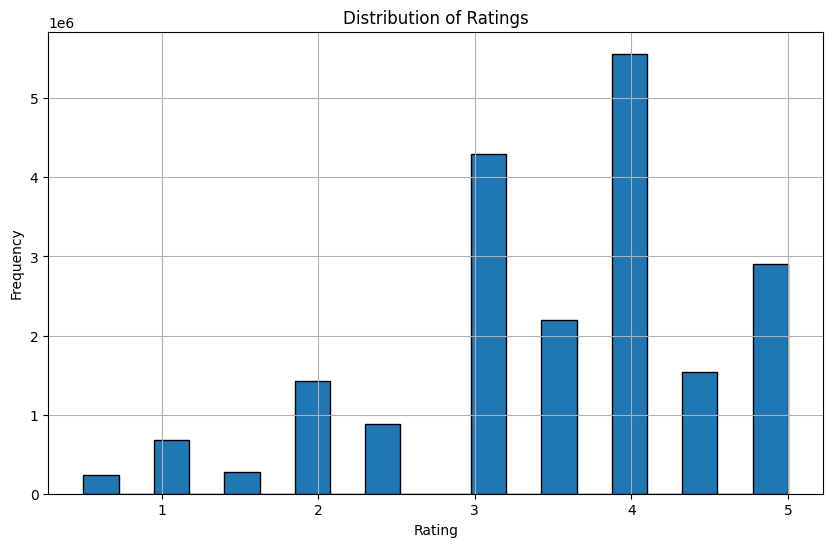

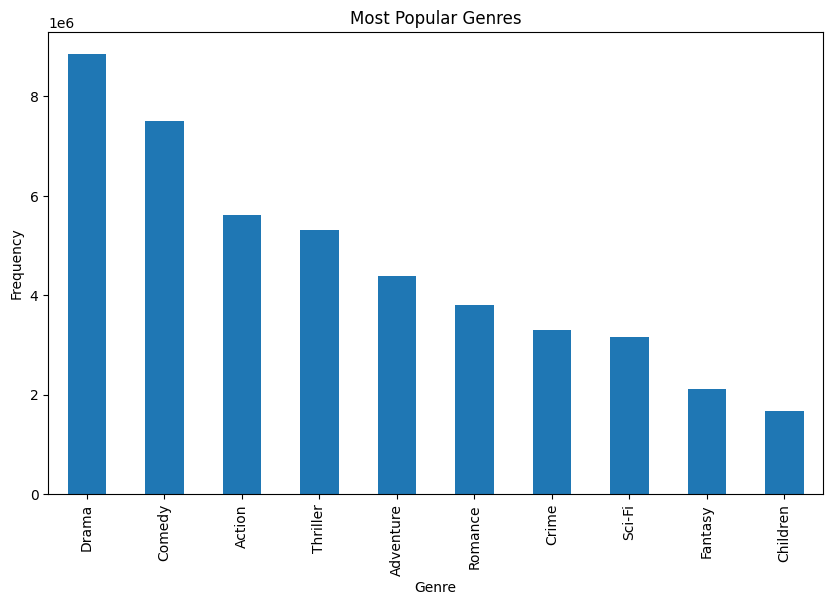

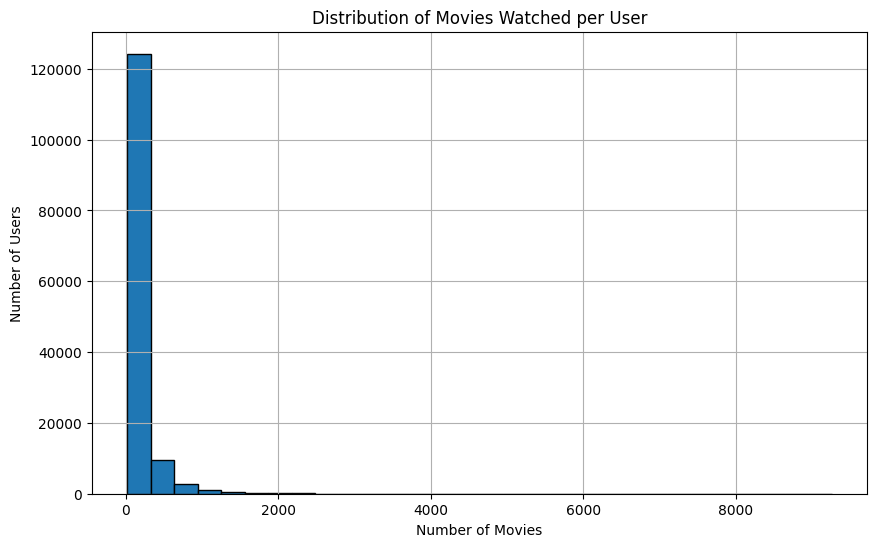

In [ ]:
import matplotlib.pyplot as plt

#Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
ratings_with_movies['rating'].hist(bins=20, edgecolor='black')  #Create a histogram for the 'rating' column
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

#Plotting the most popular genres
plt.figure(figsize=(10, 6))
genres_exploded.value_counts().head(10).plot(kind='bar')  #Create a bar plot for the top 10 most frequent genres
plt.title("Most Popular Genres")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.show()

#Plotting the distribution of the number of movies watched per user
plt.figure(figsize=(10, 6))
movies_per_user.hist(bins=30, edgecolor='black')  #Create a histogram for the number of movies watched per user
plt.title("Distribution of Movies Watched per User")
plt.xlabel("Number of Movies")
plt.ylabel("Number of Users")
plt.show()


Average Rating per Genre:
genres
Film-Noir             3.965381
War                   3.809531
Documentary           3.739718
Crime                 3.674528
Drama                 3.674296
Mystery               3.663509
IMAX                  3.655946
Animation             3.617494
Western               3.570498
Musical               3.558091
Romance               3.541803
Thriller              3.507111
Fantasy               3.505945
Adventure             3.501893
Action                3.443864
Sci-Fi                3.436773
Comedy                3.426011
Children              3.408114
Horror                3.277224
(no genres listed)    3.006925
Name: rating, dtype: float64


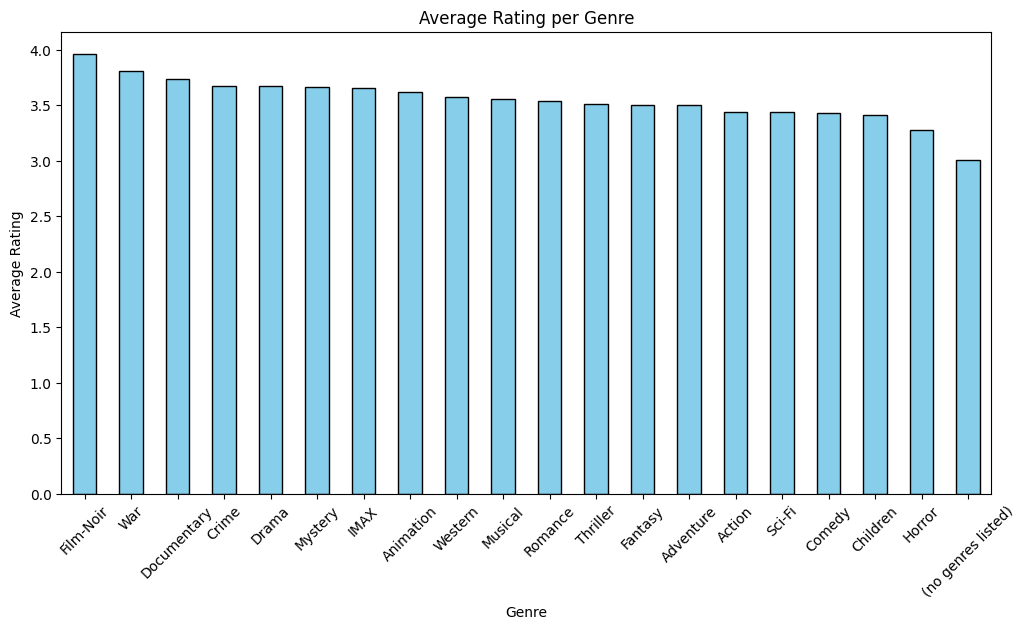

In [ ]:
#Extracting genres and their ratings
genres_ratings = ratings_with_movies[['genres', 'rating']].copy()  # Create a copy of the dataset containing only 'genres' and 'rating' columns
genres_ratings['genres'] = genres_ratings['genres'].str.split('|')  #Split the genres column into individual genres
genres_exploded = genres_ratings.explode('genres')  #Expand each genre into its own row

#Calculating the average rating for each genre
average_rating_per_genre = genres_exploded.groupby('genres')['rating'].mean().sort_values(ascending=False)

#Displaying the average ratings for each genre
print("\nAverage Rating per Genre:")
print(average_rating_per_genre)

#Visualizing the average rating per genre
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
average_rating_per_genre.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Rating per Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


Users with the highest number of ratings:
userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
74142     5447
34576     5356
131904    5330
83090     5169
59477     4988
Name: rating, dtype: int64


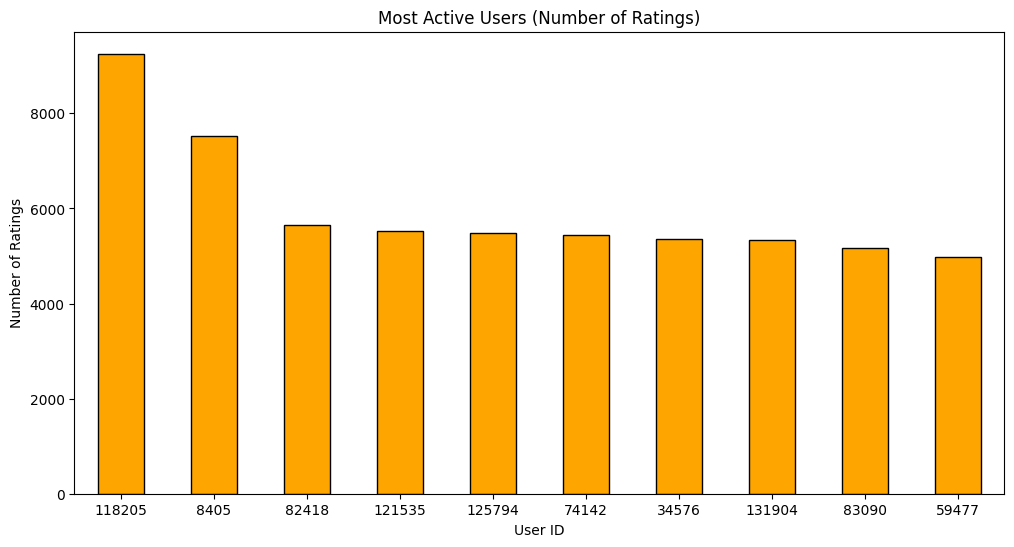

In [ ]:
#Calculating the number of ratings per user
ratings_per_user = ratings_with_movies.groupby('userId')['rating'].count().sort_values(ascending=False)
print("\nUsers with the highest number of ratings:")
print(ratings_per_user.head(10))  #Display the top 10 most active users

#Visualizing the top 10 most active users
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
ratings_per_user.head(10).plot(kind='bar', color='orange', edgecolor='black')  #Create a bar plot for the top 10 users
plt.title("Most Active Users (Number of Ratings)")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=0)
plt.show()


Top-rated movies based on average ratings:
                                               average_rating  rating_count
title                                                                      
Shawshank Redemption, The (1994)                     4.446990         63366
Godfather, The (1972)                                4.364732         41355
Usual Suspects, The (1995)                           4.334372         47006
Schindler's List (1993)                              4.310175         50054
Godfather: Part II, The (1974)                       4.275641         27398
Seven Samurai (Shichinin no samurai) (1954)          4.274180         11611
Rear Window (1954)                                   4.271334         17449
Band of Brothers (2001)                              4.263182          4305
Casablanca (1942)                                    4.258327         24349
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)        4.256935          6525

Lowest-rated movies based on average rating

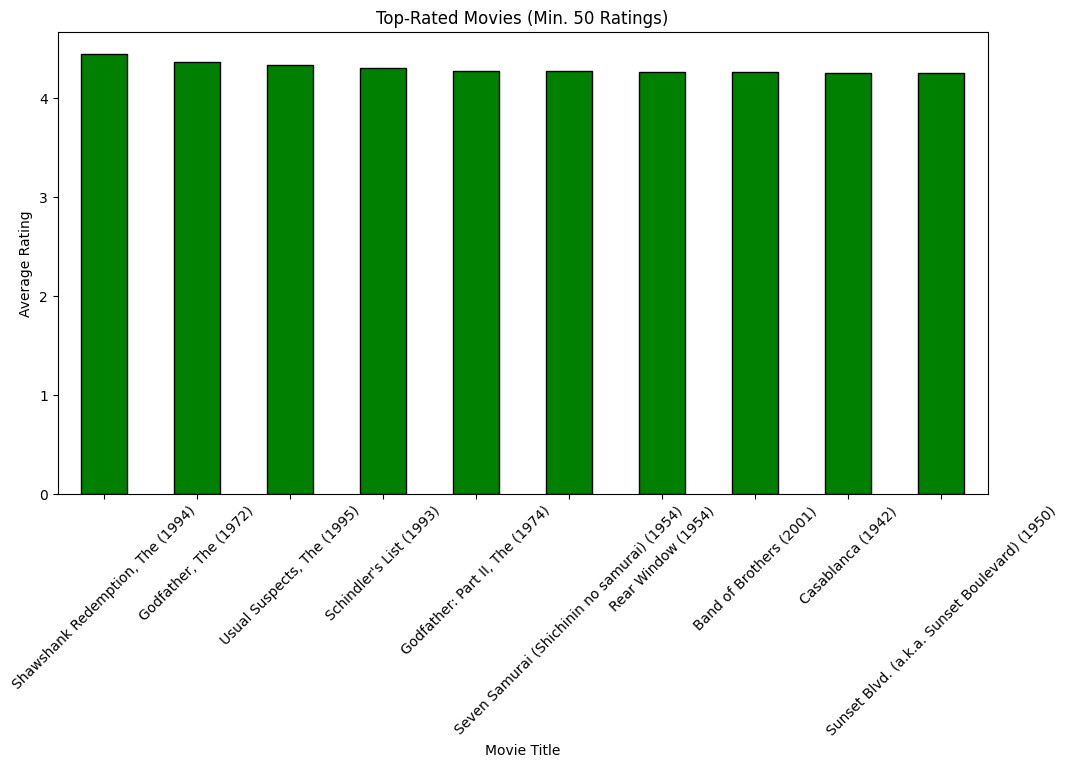

In [ ]:
#Calculate statistics for each movie: average rating and rating count
movies_stats = ratings_with_movies.groupby('title').agg(
    average_rating=('rating', 'mean'),  #Calculate the average rating for each movie
    rating_count=('rating', 'count'))  #Count the total number of ratings for each movie


#Filter movies with at least 50 ratings
popular_movies_stats = movies_stats[movies_stats['rating_count'] >= 50]

#Find the top 10 movies with the highest average ratings
top_rated_movies = popular_movies_stats.sort_values(by='average_rating', ascending=False).head(10)
print("\nTop-rated movies based on average ratings:")
print(top_rated_movies)

#Find the 10 movies with the lowest average ratings
lowest_rated_movies = popular_movies_stats.sort_values(by='average_rating').head(10)
print("\nLowest-rated movies based on average ratings:")
print(lowest_rated_movies)

#Visualize the top 10 movies with the highest average ratings
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
top_rated_movies['average_rating'].plot(kind='bar', color='green', edgecolor='black')  #Create a bar plot
plt.title("Top-Rated Movies (Min. 50 Ratings)")
plt.xlabel("Movie Title")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


Number of ratings per year:
timestamp
1995          4
1996    1612609
1997     700982
1998     308070
1999    1198384
2000    1953659
2001    1186125
2002     869719
2003    1035878
2004    1170049
2005    1803158
2006    1171836
2007    1053430
2008    1158777
2009     930036
2010     903691
2011     766366
2012     731389
2013     599327
2014     562888
2015     283886
Name: count, dtype: int64


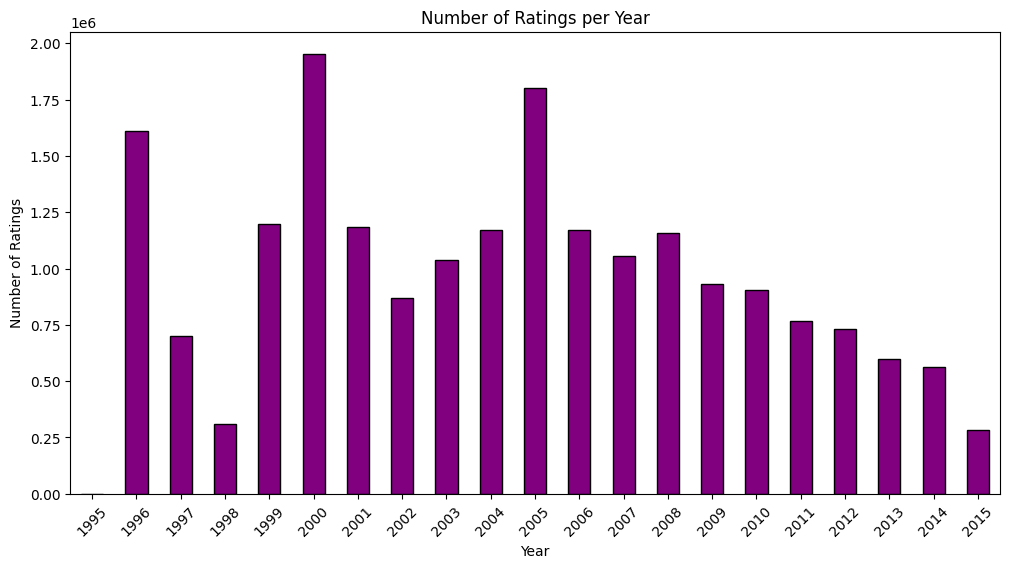


Average rating per year:
timestamp
1995    3.750000
1996    3.545408
1997    3.588522
1998    3.512484
1999    3.616337
2000    3.576119
2001    3.533771
2002    3.482654
2003    3.474775
2004    3.429614
2005    3.434001
2006    3.463172
2007    3.471741
2008    3.539019
2009    3.508644
2010    3.533408
2011    3.562192
2012    3.609827
2013    3.644767
2014    3.607711
2015    3.499819
Name: rating, dtype: float64


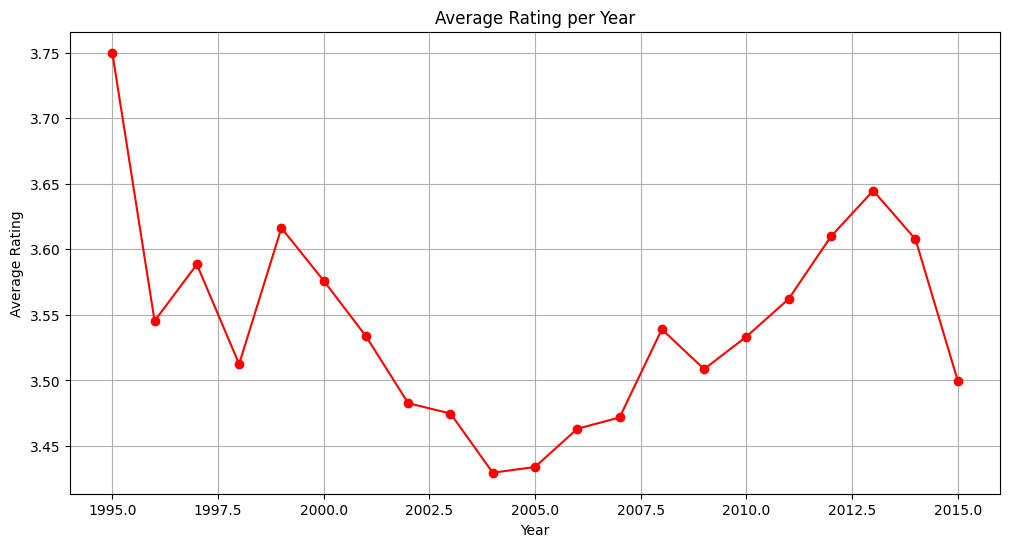

In [ ]:
#Convert the 'timestamp' column to a datetime format
ratings_with_movies['timestamp'] = pd.to_datetime(ratings_with_movies['timestamp'])

#Count the number of ratings per year
ratings_per_year = ratings_with_movies['timestamp'].dt.year.value_counts().sort_index()
print("\nNumber of ratings per year:")
print(ratings_per_year)

#Plot the number of ratings per year as a bar chart
plt.figure(figsize=(12, 6))
ratings_per_year.plot(kind='bar', color='purple', edgecolor='black')  #Create a bar chart
plt.title("Number of Ratings per Year")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.show()

#Calculate the average rating per year
average_rating_per_year = ratings_with_movies.groupby(ratings_with_movies['timestamp'].dt.year)['rating'].mean()
print("\nAverage rating per year:")
print(average_rating_per_year)

#Plot the average rating per year as a line chart
plt.figure(figsize=(12, 6))
average_rating_per_year.plot(kind='line', marker='o', color='red')  #Create a line chart with markers
plt.title("Average Rating per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid()
plt.show()

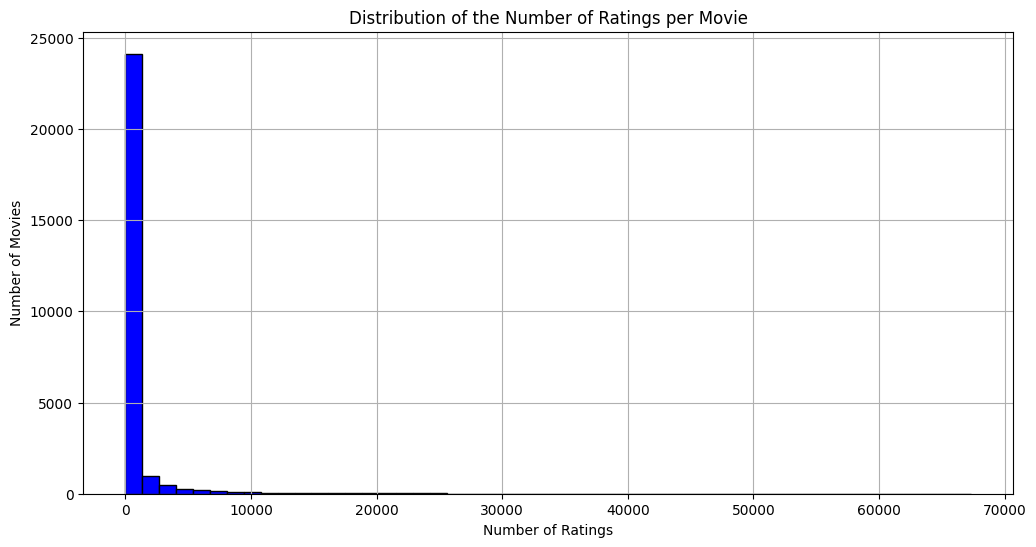

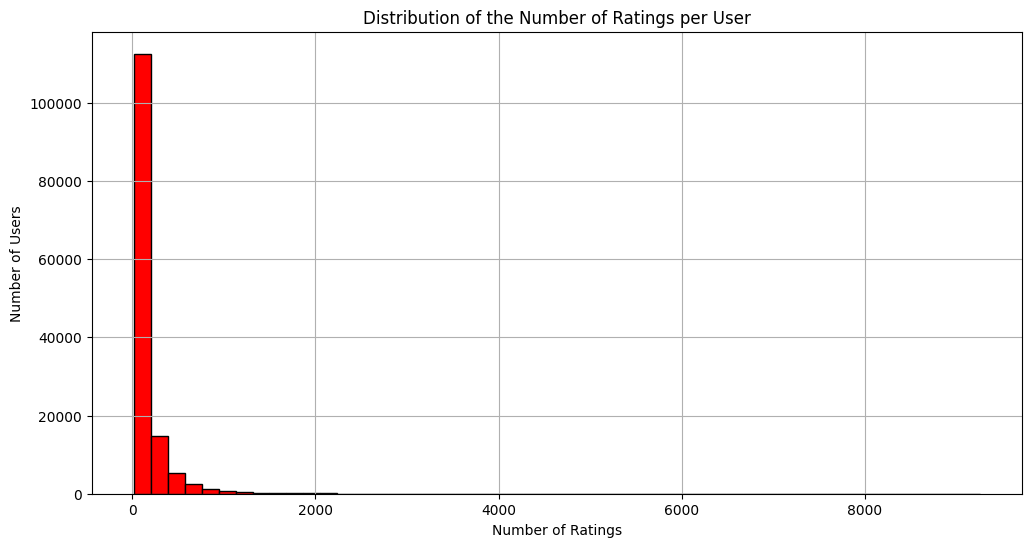

In [ ]:
#Plot the distribution of the number of ratings per movie
plt.figure(figsize=(12, 6))
ratings_per_movie.hist(bins=50, color='blue', edgecolor='black')  #Create a histogram for the number of ratings per movie
plt.title("Distribution of the Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.show()

#Plot the distribution of the number of ratings per user
plt.figure(figsize=(12, 6))
ratings_per_user.hist(bins=50, color='red', edgecolor='black')  #Create a histogram for the number of ratings per user
plt.title("Distribution of the Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

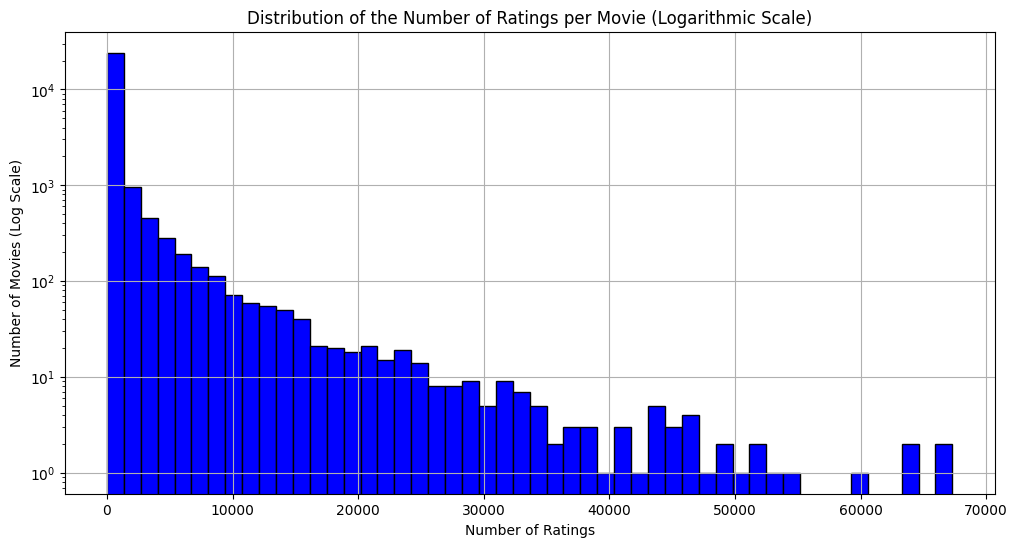

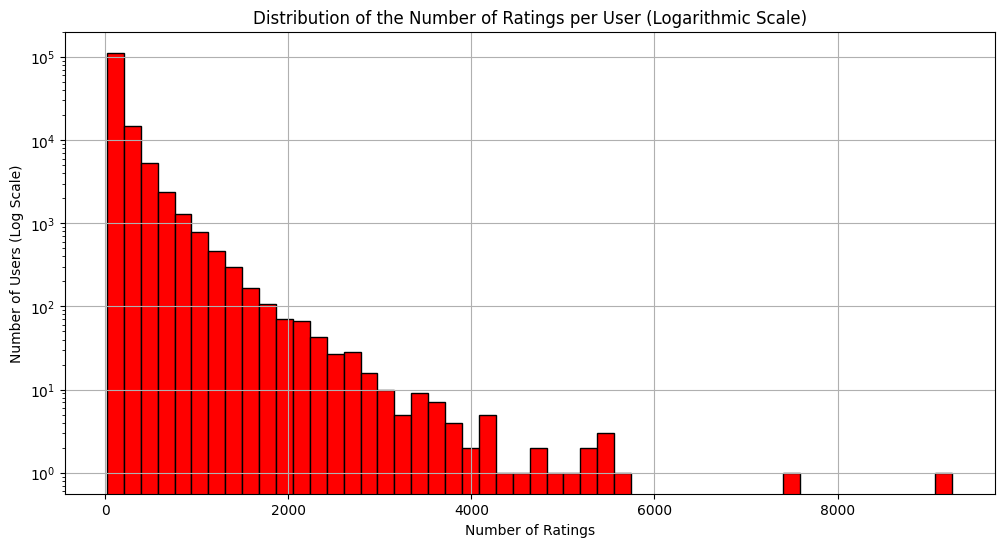

In [ ]:
#Plotting the distribution of the number of ratings per movie with logarithmic scale
plt.figure(figsize=(12, 6))
ratings_per_movie.hist(bins=50, color='blue', edgecolor='black', log=True)  #Add log scale to the y-axis
plt.title("Distribution of the Number of Ratings per Movie (Logarithmic Scale)")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies (Log Scale)")
plt.show()

#Plotting the distribution of the number of ratings per user with logarithmic scale
plt.figure(figsize=(12, 6))
ratings_per_user.hist(bins=50, color='red', edgecolor='black', log=True)  #Add log scale to the y-axis
plt.title("Distribution of the Number of Ratings per User (Logarithmic Scale)")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users (Log Scale)")
plt.show()

The analysis of the MovieLens dataset provided an overview of its main characteristics and prepared it for implementing a recommendation system based on Locality-Sensitive Hashing (LSH). The data, divided into two primary files, rating.csv and movie.csv, were merged using the common column movieId, creating a unified dataset that combines user ratings with movie details. Both datasets were free of missing or duplicate values, ensuring a reliable foundation for further analysis. The distribution of ratings revealed a predominance of high scores, with significant peaks at 4 and 5, suggesting a tendency for users to rate movies positively. The genre analysis showed that “Drama,” “Comedy,” and “Action” are the most popular genres, while less common genres like “Film-Noir” and “War” generally receive higher average ratings. The distribution of the number of movies rated per user and the number of ratings received per movie is unbalanced, with most users rating only a few movies and most movies receiving a limited number of ratings. This imbalance complicates the development of effective recommendation systems. However, highly active users, who rate a large number of movies, provide valuable insights for the system. A weak correlation (0.143) was observed between movie popularity, measured by the number of ratings received, and average ratings, indicating that popular movies are not always the highest-rated ones. Temporal analysis highlighted trends in the number of ratings over the years, with initial peaks followed by a gradual decline, while average ratings remained relatively stable over time.

# 1.2 Minhash Signatures

Using the userId and movieId columns, implement your own MinHash function. This function will hash each user's watched movie list, creating a representation that allows for quick comparisons of user similarities.

-Important: Implement your MinHash function from scratch—do not use any pre-built hash functions.

-Use your MinHash function to generate signature vectors for each user based on their rated movies.

-Experiment with different hash functions and threshold values to find the most effective configurations. Report these results.

In [ ]:
import pandas as pd
import numpy as np
import random
import itertools

#Set the random seed for reproducibility
random.seed(42)
np.random.seed(42)

#Load the ratings and movies datasets
ratings = pd.read_csv("rating.csv")
movies = pd.read_csv("movie.csv")

#Group the movies rated by each user into sets
user_movie_sets = ratings.groupby('userId')['movieId'].apply(set).to_dict()

#Generate hash functions for MinHash signatures
def generate_hash_functions(num_hashes, max_val, hash_type='linear'):
    hash_functions = []
    if hash_type == 'linear':
        for _ in range(num_hashes):
            a = random.randint(1, max_val)
            b = random.randint(0, max_val)
            hash_functions.append(lambda x, a=a, b=b, p=max_val+1: (a * x + b) % p)
    elif hash_type == 'modular':
        for _ in range(num_hashes):
            a = random.randint(1, max_val)
            b = random.randint(0, max_val)
            m = random.randint(max_val // 2, max_val)
            hash_functions.append(lambda x, a=a, b=b, m=m, n=max_val: ((a * x % m) + b) % n)
    elif hash_type == 'universal':
        for _ in range(num_hashes):
            a = random.randint(1, max_val)
            b = random.randint(0, max_val)
            c = random.randint(0, max_val)
            hash_functions.append(lambda x, a=a, b=b, c=c, p=max_val+1: ((a * x + b) ^ c) % p)

    return hash_functions

#Compute the MinHash signatures for a chunk of user data
def compute_minhash_signature_chunk(user_sets, hash_functions):
    num_users = len(user_sets)

    #Initialize the signature matrix with infinite values
    signature_matrix = np.full((len(hash_functions), num_users), np.inf)

    #Create a list of user IDs
    user_list = list(user_sets.keys())
    for user_idx, user in enumerate(user_list):
        for movie in user_sets[user]:
            for hash_idx, hash_func in enumerate(hash_functions):
                hash_value = hash_func(movie)
                if hash_value < signature_matrix[hash_idx, user_idx]:
                    signature_matrix[hash_idx, user_idx] = hash_value

    return signature_matrix, user_list

#Compute the Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    return len(set1 & set2) / len(set1 | set2) if len(set1 | set2) > 0 else 0

#Evaluate the accuracy of the MinHash signatures
def evaluate_minhash_accuracy(signature_matrix, user_list, user_movie_sets, sample_size, thresholds):
    user_indices = list(range(len(user_list)))
    #Randomly sample pairs of users
    sampled_pairs = random.sample(list(itertools.combinations(user_indices, 2)), sample_size)

    errors = []
    threshold_counts = {threshold: 0 for threshold in thresholds}

    #ompare estimated and real Jaccard similarities
    for user_idx1, user_idx2 in sampled_pairs:
        user1, user2 = user_list[user_idx1], user_list[user_idx2]
        real_jaccard = jaccard_similarity(user_movie_sets[user1], user_movie_sets[user2])
        estimated_jaccard = np.mean(signature_matrix[:, user_idx1] == signature_matrix[:, user_idx2])

        errors.append(abs(real_jaccard - estimated_jaccard))

        for threshold in thresholds:
            if real_jaccard >= threshold:
                threshold_counts[threshold] += 1

    return np.mean(errors), threshold_counts

#Run MinHash experiments in chunks
def run_minhash_experiments_chunks(user_movie_sets, hash_types, num_hashes_list, chunk_size, sample_size, thresholds):
    max_movie_id = max(max(user_set) for user_set in user_movie_sets.values())
    user_ids = list(user_movie_sets.keys())
    experiment_results = []

    total_users = len(user_ids)
    print(f"Total number of users processed: {total_users}")

    #Loop through hash types and number of hash functions
    for hash_type in hash_types:
        for num_hashes in num_hashes_list:
            hash_functions = generate_hash_functions(num_hashes, max_movie_id, hash_type)
            global_errors = []
            global_threshold_counts = {threshold: 0 for threshold in thresholds}

            #Process users in chunks
            for chunk_start in range(0, total_users, chunk_size):
                chunk_end = min(chunk_start + chunk_size, total_users)
                user_chunk_ids = user_ids[chunk_start:chunk_end]
                user_chunk_sets = {user: user_movie_sets[user] for user in user_chunk_ids}

                signature_matrix, user_list = compute_minhash_signature_chunk(user_chunk_sets, hash_functions)

                #Evaluate the accuracy on the entire dataset
                chunk_full_sets = {user: user_movie_sets[user] for user in user_ids}
                mean_error, chunk_threshold_counts = evaluate_minhash_accuracy(
                    signature_matrix, user_list, chunk_full_sets, sample_size, thresholds
                )

                global_errors.append(mean_error)

                for threshold in thresholds:
                    global_threshold_counts[threshold] += chunk_threshold_counts[threshold]

            #Calculate overall results
            global_mean_error = np.mean(global_errors)
            experiment_results.append({
                'hash_type': hash_type,
                'num_hashes': num_hashes,
                'global_mean_error': global_mean_error,
                'global_threshold_counts': global_threshold_counts
            })

    return experiment_results

#Experiment configuration
hash_types = ['linear', 'modular', 'universal']
num_hashes_list = [50, 100, 200]
chunk_size = 1000
sample_size = 100000
thresholds = [0.2, 0.4, 0.6, 0.8]

#Run the experiments
results = run_minhash_experiments_chunks(user_movie_sets, hash_types, num_hashes_list, chunk_size, sample_size, thresholds)

#Print the final results
print("\n--- Aggregate Final Results ---")
for result in results:
    print(f"Hash Type: {result['hash_type']}, Num Hashes: {result['num_hashes']}, "
          f"Global Mean Error: {result['global_mean_error']:.4f}")
    for threshold, count in result['global_threshold_counts'].items():
        print(f"  Pairs with Jaccard similarity >= {threshold}: {count}")

Total number of users processed: 138493

--- Aggregate Final Results ---
Hash Type: linear, Num Hashes: 50, Global Mean Error: 0.0189
  Pairs with Jaccard similarity >= 0.2: 324515
  Pairs with Jaccard similarity >= 0.4: 27190
  Pairs with Jaccard similarity >= 0.6: 1582
  Pairs with Jaccard similarity >= 0.8: 45
Hash Type: linear, Num Hashes: 100, Global Mean Error: 0.0135
  Pairs with Jaccard similarity >= 0.2: 324406
  Pairs with Jaccard similarity >= 0.4: 27567
  Pairs with Jaccard similarity >= 0.6: 1610
  Pairs with Jaccard similarity >= 0.8: 42
Hash Type: linear, Num Hashes: 200, Global Mean Error: 0.0096
  Pairs with Jaccard similarity >= 0.2: 325606
  Pairs with Jaccard similarity >= 0.4: 27371
  Pairs with Jaccard similarity >= 0.6: 1612
  Pairs with Jaccard similarity >= 0.8: 52
Hash Type: modular, Num Hashes: 50, Global Mean Error: 0.0205
  Pairs with Jaccard similarity >= 0.2: 324109
  Pairs with Jaccard similarity >= 0.4: 27280
  Pairs with Jaccard similarity >= 0.6: 1638

In this section, a MinHash function was implemented to compute the signatures of the movie sets rated by users. The primary goal was to represent each user through a compact signature that enables quick comparisons of similarity between users. To achieve this, various hash configurations and numbers of hash functions were explored, testing their effectiveness.
The code introduced three main types of hash functions: linear, modular, and universal, each with distinct characteristics. The linear type relies on basic arithmetic operations, while the modular type applies an intermediate modulo operation to vary the results. Lastly, the universal type incorporates an XOR operation to introduce additional randomness. For each configuration, different numbers of hash functions (50, 100, and 200) were tested to identify the most effective combination.
The signature computation process was divided into chunks to handle the large number of users (138,493) and improve computational efficiency. For each chunk, a MinHash signature matrix was constructed, and estimated similarities were compared to the actual ones, calculated using the Jaccard similarity. Random sampling of user pairs allowed for the evaluation of the mean absolute error between the two similarities, providing a key measure of the accuracy for each configuration.
The aggregated results showed that increasing the number of hash functions significantly reduces the global mean error, regardless of the hash type used. For instance, for the linear hash type, the global error decreased from 0.0189 (50 hash functions) to 0.0096 (200 hash functions). Similarly, modular and universal hashes exhibited consistent behaviors, with proportional improvements in accuracy.
Different Jaccard similarity thresholds (0.2, 0.4, 0.6, and 0.8) were also analyzed for each configuration. The results indicated that configurations with a higher number of hash functions identified more user pairs with high similarities, demonstrating a greater ability to capture complex relationships between users.
Based on these observations, the linear hash type was chosen for future analyses due to its consistent performance and lower computational complexity compared to the other types. This decision will streamline the subsequent application of LSH algorithms in the next section, leveraging the user similarity representations to build a robust recommendation system.

# 1.3 Locality-Sensitive Hashing (LSH)

Now that you have generated MinHash user signatures, apply Locality-Sensitive Hashing (LSH) to cluster similar users.

Bucket Creation: For each user, divide the MinHash signature into bands and hash each band to form buckets. Users with similar bands should fall into the same buckets.


Query: For a given user, identify the two most similar users based on their bucket placement. If a user doesn’t have any similar users in their bucket, adjust the parameters until similar users are found.

Movie Recommendation Logic:
  -If both similar users have rated a movie, recommend this movie based on the average rating.
  -If there are no commonly rated movies, recommend the top-rated movies of the most similar user.
  
Final Recommendation: Provide at most five movies to the user.

Filtering users with fewer than 50 ratings...
Number of users after filtering: 85307
Filtering movies rated by fewer than 20 users...
Number of movies after filtering: 13063

Running with num_hashes=100, num_bands=10, rows_per_band=10
Time taken: 487.42 seconds


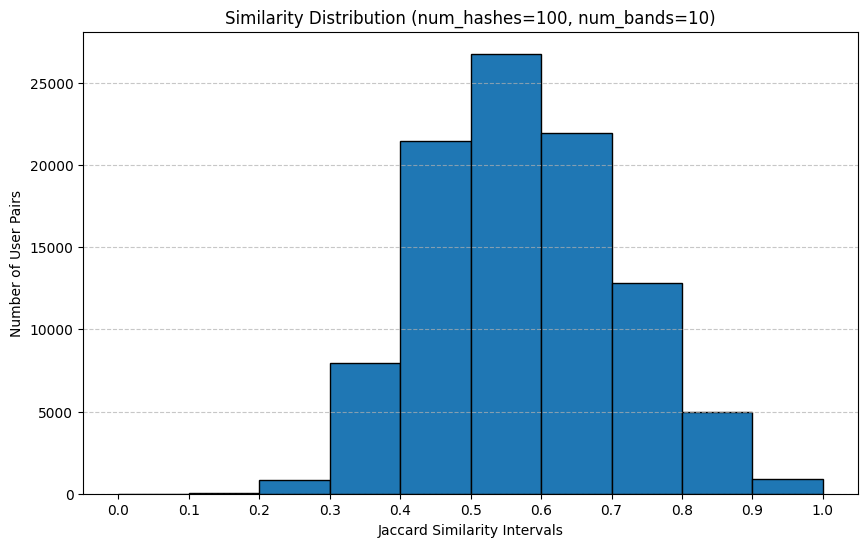


Running with num_hashes=100, num_bands=20, rows_per_band=5
Time taken: 598.89 seconds


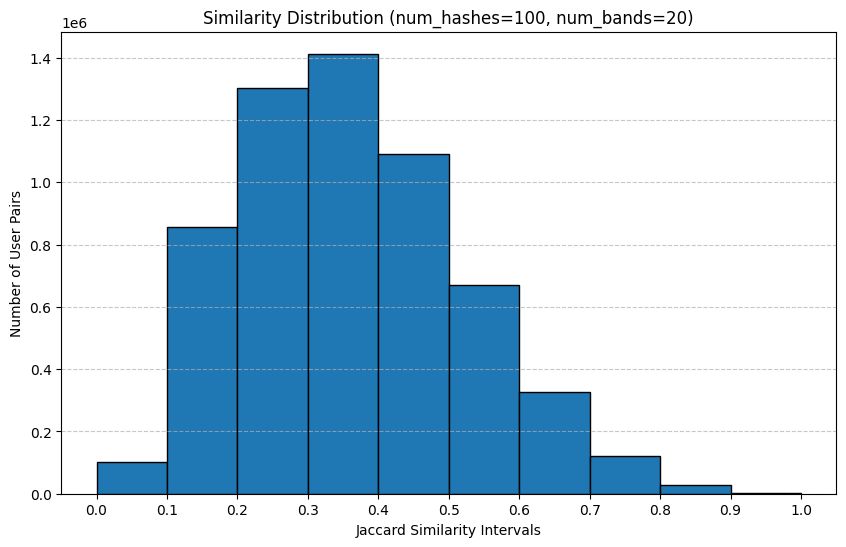


Running with num_hashes=100, num_bands=30, rows_per_band=3
Time taken: 4488.62 seconds


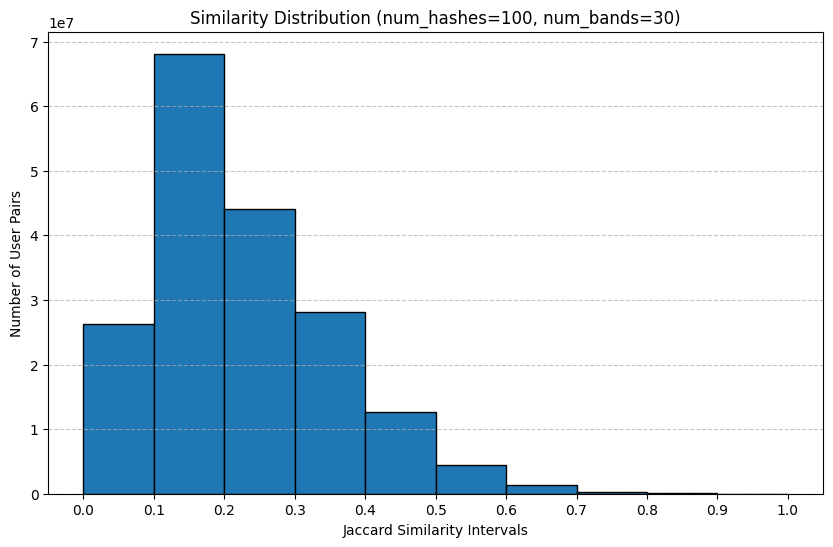


Running with num_hashes=200, num_bands=10, rows_per_band=20
Time taken: 1004.83 seconds


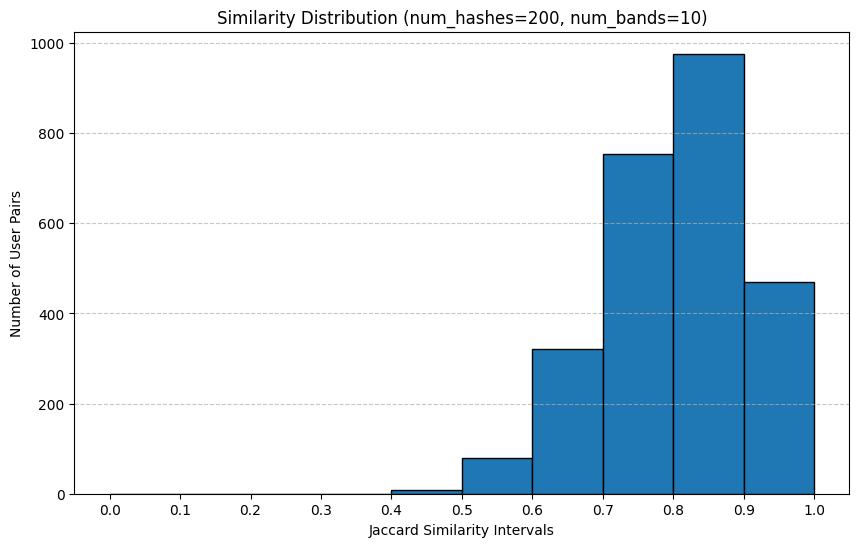


Running with num_hashes=200, num_bands=20, rows_per_band=10
Time taken: 1049.97 seconds


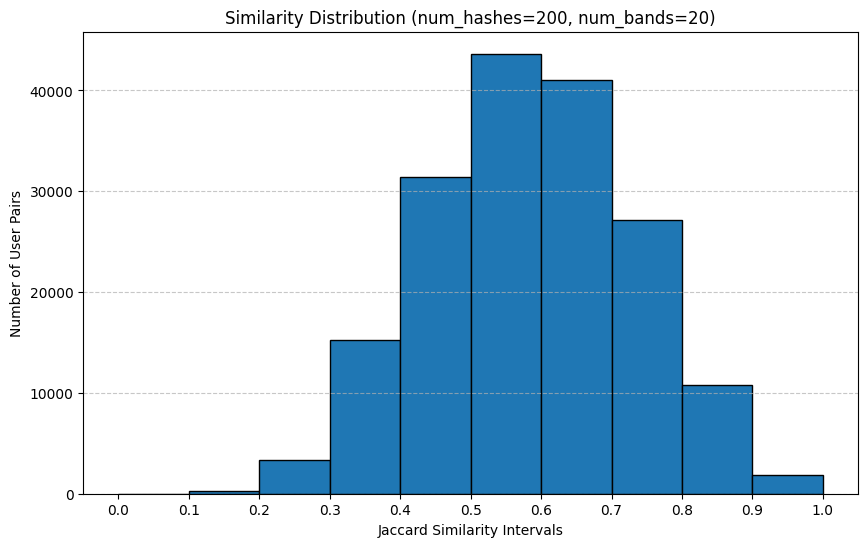


Running with num_hashes=200, num_bands=30, rows_per_band=6
Time taken: 1102.60 seconds


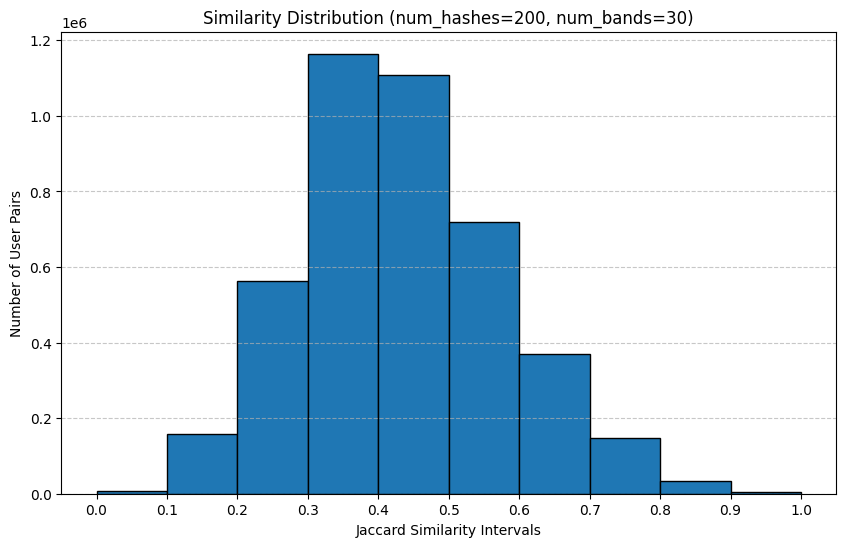


Running with num_hashes=300, num_bands=10, rows_per_band=30
Time taken: 1519.88 seconds


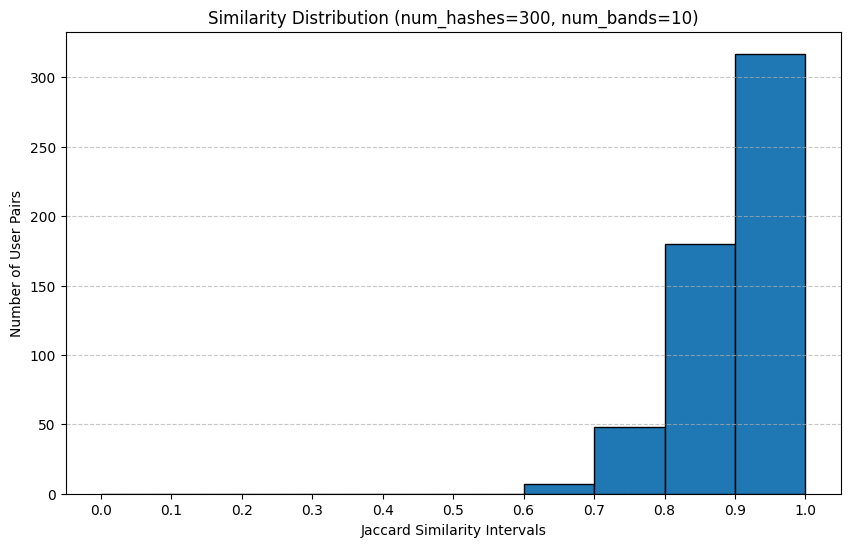


Running with num_hashes=300, num_bands=20, rows_per_band=15
Time taken: 1573.76 seconds


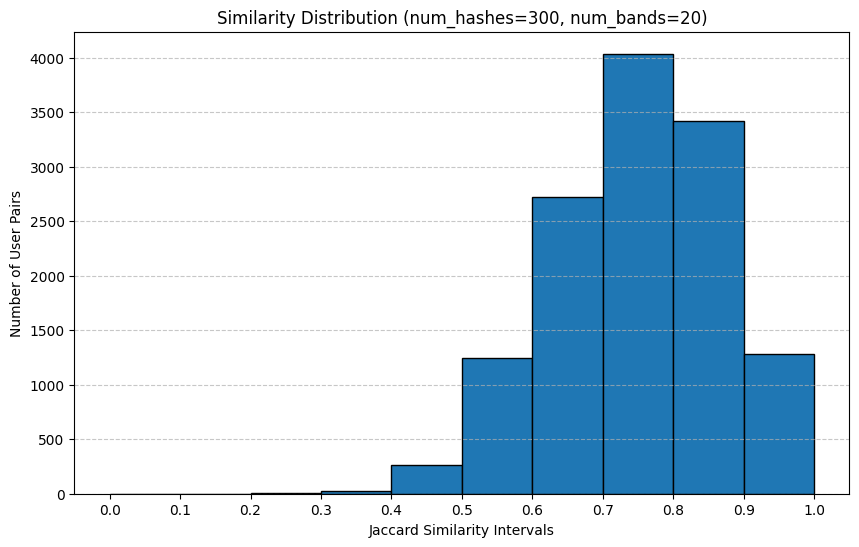


Running with num_hashes=300, num_bands=30, rows_per_band=10
Time taken: 1679.61 seconds


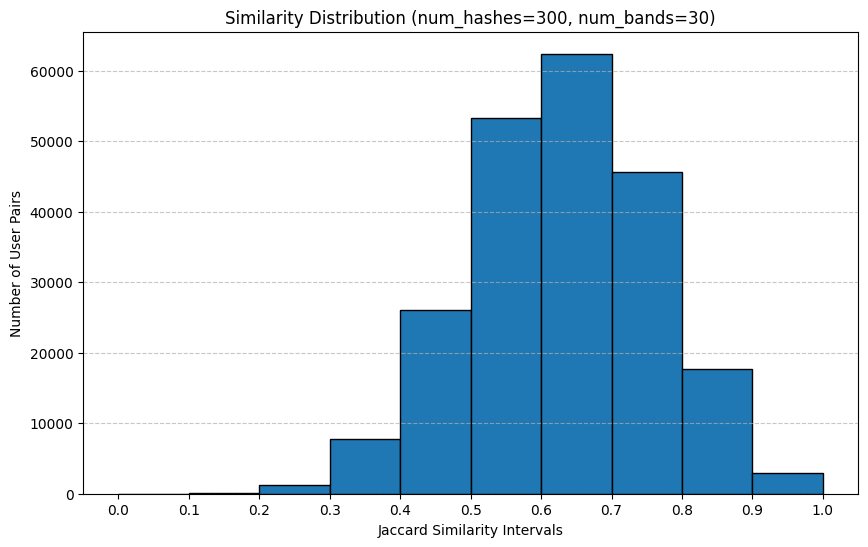


Summary of tested configurations:
Configuration: num_hashes=100, num_bands=10, rows_per_band=10
  Average similarity: 0.577
  Average number of users per bucket: 3.47
  Average number of pairs compared per bucket: 21.21
  Percentage of unique users: 7.83%
  Non-empty buckets: 4605
  Pairs with Jaccard similarity >= 0.2: 97636
  Pairs with Jaccard similarity >= 0.4: 88846
  Pairs with Jaccard similarity >= 0.6: 41128
  Pairs with Jaccard similarity >= 0.8: 5894

Configuration: num_hashes=100, num_bands=20, rows_per_band=5
  Average similarity: 0.362
  Average number of users per bucket: 4.20
  Average number of pairs compared per bucket: 57.30
  Percentage of unique users: 82.99%
  Non-empty buckets: 103195
  Pairs with Jaccard similarity >= 0.2: 4954172
  Pairs with Jaccard similarity >= 0.4: 2237040
  Pairs with Jaccard similarity >= 0.6: 487672
  Pairs with Jaccard similarity >= 0.8: 29160

Configuration: num_hashes=100, num_bands=30, rows_per_band=3
  Average similarity: 0.225
  Av

In [ ]:
import pandas as pd
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import time

#Set the random seed for reproducibility
random.seed(42)
np.random.seed(42)

#Load the ratings and movies datasets
ratings = pd.read_csv("rating.csv")
movies = pd.read_csv("movie.csv")

#Convert movie details into a dictionary for easy access
movie_details = movies.set_index('movieId').to_dict('index')

#Define minimum thresholds for filtering users and movies
min_user_ratings = 50  # Minimum number of ratings a user must have
min_movie_ratings = 20  # Minimum number of users who must rate a movie

#filter users with fewer than the minimum number of ratings
print("Filtering users with fewer than 50 ratings...")
user_counts = ratings['userId'].value_counts()
filtered_users = user_counts[user_counts >= min_user_ratings].index
ratings = ratings[ratings['userId'].isin(filtered_users)]
print(f"Number of users after filtering: {len(filtered_users)}")

#Filter movies rated by fewer than the minimum number of users
print("Filtering movies rated by fewer than 20 users...")
movie_counts = ratings['movieId'].value_counts()
filtered_movies = movie_counts[movie_counts >= min_movie_ratings].index
ratings = ratings[ratings['movieId'].isin(filtered_movies)]
print(f"Number of movies after filtering: {len(filtered_movies)}")

#Create a dictionary of movies rated by each user
user_movie_sets = ratings.groupby('userId')['movieId'].apply(set).to_dict()

#Generate hash functions for MinHash
def generate_hash_functions(num_hashes, max_val):
    hash_functions = []
    for _ in range(num_hashes):
        a = random.randint(1, max_val)  # Random coefficient a
        b = random.randint(0, max_val)  # Random coefficient b
        hash_functions.append(lambda x, a=a, b=b, p=max_val+1: (a * x + b) % p)
    return hash_functions

# Compute MinHash signatures for all users
def compute_minhash_signatures(user_sets, hash_functions):
    num_users = len(user_sets)  # Total number of users
    #Initialize the signature matrix with infinity values
    signature_matrix = np.full((len(hash_functions), num_users), np.inf)
    user_list = list(user_sets.keys())  
    for user_idx, user in enumerate(user_list):
        for movie in user_sets[user]:  # For each movie rated by the user
            for hash_idx, hash_func in enumerate(hash_functions):
                signature_matrix[hash_idx, user_idx] = min(signature_matrix[hash_idx, user_idx], hash_func(movie))
    return signature_matrix, user_list

#Compute the Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    return len(set1 & set2) / len(set1 | set2) if len(set1 | set2) > 0 else 0

# Create LSH buckets from the MinHash signatures
def create_lsh_buckets(signature_matrix, num_bands, rows_per_band):
    buckets = defaultdict(list)  #Initialize buckets
    for band in range(num_bands):
        start_row = band * rows_per_band  #Start row for the band
        end_row = start_row + rows_per_band  #End row for the band
        for user_idx in range(signature_matrix.shape[1]):
            band_signature = tuple(signature_matrix[start_row:end_row, user_idx])  #Band signature for the user
            buckets[(band, band_signature)].append(user_idx)  #Add user to the bucket
    return buckets

# Define the configuration for experiments
hashes_list = [100, 200, 300]  #Number of hash functions to test
bands_list = [10, 20, 30]  #number of bands to test
thresholds = [0.2, 0.4, 0.6, 0.8]  #Jaccard similarity thresholds

#Find the maximum movie ID for hash function generation
max_movie_id = max(max(user_set) for user_set in user_movie_sets.values())

results = []  #Initialize a list to store the results
for num_hashes in hashes_list:
    for num_bands in bands_list:
        rows_per_band = num_hashes // num_bands  # Compute rows per band
        if rows_per_band == 0:  # Skip invalid configurations
            continue

        print(f"\nRunning with num_hashes={num_hashes}, num_bands={num_bands}, rows_per_band={rows_per_band}")

        start_time = time.time()  #Start timer

        #Generate hash functions
        hash_functions = generate_hash_functions(num_hashes, max_movie_id)

        #Compute MinHash signatures
        signature_matrix, user_list = compute_minhash_signatures(user_movie_sets, hash_functions)

        #Create LSH buckets
        buckets = create_lsh_buckets(signature_matrix, num_bands, rows_per_band)

        #Filter buckets with more than one user
        non_empty_buckets = {key: users for key, users in buckets.items() if len(users) > 1}

        #Calculate metrics
        total_users_in_buckets = sum(len(users) for users in non_empty_buckets.values())
        unique_users_in_buckets = len(set(user for users in non_empty_buckets.values() for user in users))
        total_pairs = sum(len(users) * (len(users) - 1) // 2 for users in non_empty_buckets.values())
        total_buckets = len(non_empty_buckets)
        avg_users_per_bucket = total_users_in_buckets / total_buckets if total_buckets > 0 else 0
        avg_pairs_per_bucket = total_pairs / total_buckets if total_buckets > 0 else 0
        unique_user_percentage = (unique_users_in_buckets / len(user_list)) * 100

        #Compute similarities between user pairs
        similarities = []
        for bucket_users in non_empty_buckets.values():
            for i in range(len(bucket_users)):
                for j in range(i + 1, len(bucket_users)):
                    user1_idx = bucket_users[i]
                    user2_idx = bucket_users[j]
                    user1 = user_list[user1_idx]
                    user2 = user_list[user2_idx]
                    sim = jaccard_similarity(user_movie_sets[user1], user_movie_sets[user2])
                    similarities.append(sim)

        avg_similarity = np.mean(similarities) if similarities else 0

        #Count pairs for each threshold
        threshold_counts = {threshold: sum(1 for sim in similarities if sim >= threshold) for threshold in thresholds}

        elapsed_time = time.time() - start_time  #Calculate elapsed time
        print(f"Time taken: {elapsed_time:.2f} seconds")

        #Store results
        results.append({
            "num_hashes": num_hashes,
            "num_bands": num_bands,
            "rows_per_band": rows_per_band,
            "avg_similarity": avg_similarity,
            "avg_users_per_bucket": avg_users_per_bucket,
            "avg_pairs_per_bucket": avg_pairs_per_bucket,
            "unique_user_percentage": unique_user_percentage,
            "elapsed_time": elapsed_time,
            "non_empty_buckets": total_buckets,
            "similarities": similarities,
            "threshold_counts": threshold_counts
        })

        #Plot similarity distribution
        bins = np.arange(0, 1.1, 0.1)
        hist, bin_edges = np.histogram(similarities, bins=bins)

        plt.figure(figsize=(10, 6))
        plt.bar(bin_edges[:-1], hist, width=0.1, edgecolor="black", align="edge")
        plt.xlabel("Jaccard Similarity Intervals")
        plt.ylabel("Number of User Pairs")
        plt.title(f"Similarity Distribution (num_hashes={num_hashes}, num_bands={num_bands})")
        plt.xticks(bins)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()

#Print summary of configurations and results
print("\nSummary of tested configurations:")
for result in results:
    print(f"Configuration: num_hashes={result['num_hashes']}, num_bands={result['num_bands']}, rows_per_band={result['rows_per_band']}")
    print(f"  Average similarity: {result['avg_similarity']:.3f}")
    print(f"  Average number of users per bucket: {result['avg_users_per_bucket']:.2f}")
    print(f"  Average number of pairs compared per bucket: {result['avg_pairs_per_bucket']:.2f}")
    print(f"  Percentage of unique users: {result['unique_user_percentage']:.2f}%")
    print(f"  Non-empty buckets: {result['non_empty_buckets']}")
    for threshold, count in result["threshold_counts"].items():
        print(f"  Pairs with Jaccard similarity >= {threshold}: {count}")
    print()

The developed code follows a well-structured pipeline starting with data preprocessing. The files rating.csv and movie.csv, containing user ratings and movie details respectively, are loaded and prepared for processing. Users who rated fewer than 50 movies and movies rated by fewer than 20 users are filtered out, reducing the dataset size and improving system scalability.
Next, MinHash signatures are generated using random hash functions. Each user is represented by a MinHash signature summarizing their set of rated movies. The signature matrix is then divided into bands, where users with identical signatures in a band are placed in the same bucket. This process, known as LSH, focuses comparisons on potentially similar users, drastically reducing the total number of comparisons.
To evaluate system performance, several configurations were tested by varying the number of hash functions and bands. The tested combinations include num_hashes = [100, 200, 300] and num_bands = [10, 20, 30]. Key metrics such as user coverage, the percentage of non-empty buckets, the average number of users per bucket, and the distribution of Jaccard similarities between users were calculated.
After an in-depth analysis, two optimal configurations were selected for the next project phase. The first chosen configuration is 100-20, representing a good trade-off between coverage and precision. This configuration achieves 82.99% user coverage, with an average of 4.2 users per bucket and a mean similarity of 0.362. This balance makes it suitable for a system that aims to include most users while maintaining acceptable precision.
The second selected configuration is 200-20, which stands out for higher precision at the expense of lower coverage. With a mean similarity of 0.585 and a coverage percentage of 13.71%, this setup reduces false positives and ensures that users identified as similar have genuinely similar tastes. The system thus becomes more selective, requiring more similar signatures to consider two users as matching.
The results highlight that both the number of hash functions and bands significantly impact system performance. A higher number of hash functions improves precision by reducing accidental collisions, while increasing the number of bands enhances coverage by generating more buckets, though it risks introducing false positives. This balance between precision and coverage was the primary criterion for selecting the configurations.
In conclusion, the 100-20 and 200-20 configurations were chosen for the project’s next stages to maximize coverage and precision, respectively. These configurations optimize both the number of required comparisons and the quality of recommendations. The results provide a solid foundation for further development of the recommendation system, improving its effectiveness and efficiency when handling large datasets.

# 100-20, 200-20 0,4

Filtering users with less than 50 ratings...
Number of users after filtering: 85307
Filtering movies rated by less than 20 users...
Number of movies after filtering: 13063

Evaluating configuration: num_hashes=100, num_bands=20
Rows per band: 5
Total number of buckets: 1405329
Buckets with more than one user: 97421

True pairs above threshold 0.4: 446
Sampled bucket pairs: 1000
False positives: 554
False negatives: 0

Distribution of Jaccard Similarities:
Range 0.0 - 0.1: 35128 pairs
Range 0.1 - 0.2: 491157 pairs
Range 0.2 - 0.3: 1094830 pairs
Range 0.3 - 0.4: 1645193 pairs
Range 0.4 - 0.5: 1339354 pairs
Range 0.5 - 0.6: 737564 pairs
Range 0.6 - 0.7: 316127 pairs
Range 0.7 - 0.8: 109775 pairs
Range 0.8 - 0.9: 24870 pairs
Range 0.9 - 1.0: 2598 pairs


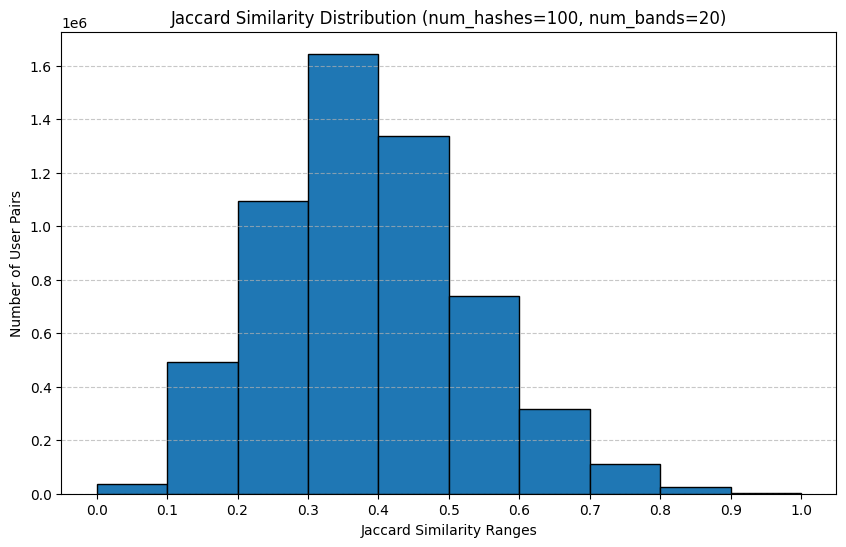


Evaluating configuration: num_hashes=200, num_bands=20
Rows per band: 10
Total number of buckets: 1682178
Buckets with more than one user: 10483

True pairs above threshold 0.4: 884
Sampled bucket pairs: 1000
False positives: 116
False negatives: 0

Distribution of Jaccard Similarities:
Range 0.0 - 0.1: 1 pairs
Range 0.1 - 0.2: 180 pairs
Range 0.2 - 0.3: 2835 pairs
Range 0.3 - 0.4: 14298 pairs
Range 0.4 - 0.5: 30567 pairs
Range 0.5 - 0.6: 42006 pairs
Range 0.6 - 0.7: 42704 pairs
Range 0.7 - 0.8: 29682 pairs
Range 0.8 - 0.9: 11510 pairs
Range 0.9 - 1.0: 1895 pairs


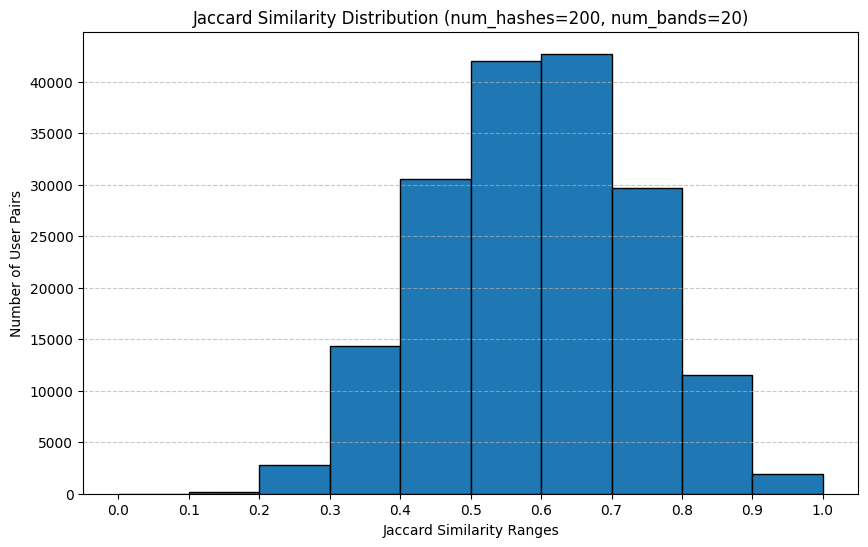

In [ ]:
import pandas as pd
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt

#Set the random seed for reproducibility
random.seed(42)
np.random.seed(42)

#Load the ratings and movies datasets from CSV files
ratings = pd.read_csv("rating.csv")  
movies = pd.read_csv("movie.csv")    

#Convert movie details into a dictionary for quick lookup by movieId
movie_details = movies.set_index('movieId').to_dict('index')

#Define minimum thresholds for filtering users and movies
min_user_ratings = 50  #Minimum number of ratings a user must have
min_movie_ratings = 20  #Minimum number of users who must rate a movie

#Filter users with fewer than the minimum number of ratings
print("Filtering users with less than 50 ratings...")
user_counts = ratings['userId'].value_counts()  
filtered_users = user_counts[user_counts >= min_user_ratings].index  
ratings = ratings[ratings['userId'].isin(filtered_users)]  
print(f"Number of users after filtering: {len(filtered_users)}")

# Filter movies rated by fewer than the minimum number of users
print("Filtering movies rated by less than 20 users...")
movie_counts = ratings['movieId'].value_counts()  
filtered_movies = movie_counts[movie_counts >= min_movie_ratings].index  
ratings = ratings[ratings['movieId'].isin(filtered_movies)]  
print(f"Number of movies after filtering: {len(filtered_movies)}")

#Create a dictionary where each user's key is mapped to the set of movies they rated
user_movie_sets = ratings.groupby('userId')['movieId'].apply(set).to_dict()

#Function to generate hash functions for MinHash signatures
def generate_hash_functions(num_hashes, max_val):
    hash_functions = []
    for _ in range(num_hashes):
        a = random.randint(1, max_val)  
        b = random.randint(0, max_val)  
        hash_functions.append(lambda x, a=a, b=b, p=max_val+1: (a * x + b) % p)
    return hash_functions

#Function to compute MinHash signatures for all users
def compute_minhash_signatures(user_sets, hash_functions):
    num_users = len(user_sets)
    signature_matrix = np.full((len(hash_functions), num_users), np.inf)
    user_list = list(user_sets.keys())
    for user_idx, user in enumerate(user_list):
        for movie in user_sets[user]:
            for hash_idx, hash_func in enumerate(hash_functions):
                signature_matrix[hash_idx, user_idx] = min(signature_matrix[hash_idx, user_idx], hash_func(movie))
    return signature_matrix, user_list

#Function to compute Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    return len(set1 & set2) / len(set1 | set2) if len(set1 | set2) > 0 else 0

#Function to create buckets using Locality-Sensitive Hashing (LSH)
def create_lsh_buckets(signature_matrix, num_bands, rows_per_band):
    buckets = defaultdict(list)
    for band in range(num_bands):
        start_row = band * rows_per_band
        end_row = start_row + rows_per_band
        for user_idx in range(signature_matrix.shape[1]):
            band_signature = tuple(signature_matrix[start_row:end_row, user_idx])
            buckets[(band, band_signature)].append(user_idx)
    return buckets

#Function to calculate false positives and negatives
def calculate_false_positives_and_negatives(user_list, user_movie_sets, bucket_pairs_sample, threshold=0.4):
    true_pairs = {
        (user1, user2)
        for user1, user2 in bucket_pairs_sample
        if jaccard_similarity(user_movie_sets[user1], user_movie_sets[user2]) >= threshold
    }

    bucket_pairs_sample_set = set(bucket_pairs_sample)

    #Calculate false positives and negatives
    false_positives = len(bucket_pairs_sample_set - true_pairs)
    false_negatives = len(true_pairs - bucket_pairs_sample_set)

    print(f"\nTrue pairs above threshold {threshold}: {len(true_pairs)}")
    print(f"Sampled bucket pairs: {len(bucket_pairs_sample)}")
    print(f"False positives: {false_positives}")
    print(f"False negatives: {false_negatives}")

    return false_positives, false_negatives

#Evaluate two configurations
for num_hashes, num_bands in [(100, 20), (200, 20)]:
    rows_per_band = num_hashes // num_bands  #Rows in each band

    #Generate hash functions and compute signatures
    max_movie_id = max(max(user_set) for user_set in user_movie_sets.values())
    hash_functions = generate_hash_functions(num_hashes, max_movie_id)
    signature_matrix, user_list = compute_minhash_signatures(user_movie_sets, hash_functions)

    print(f"\nEvaluating configuration: num_hashes={num_hashes}, num_bands={num_bands}")
    print(f"Rows per band: {rows_per_band}")

    #Create buckets using LSH
    buckets = create_lsh_buckets(signature_matrix, num_bands, rows_per_band)
    print(f"Total number of buckets: {len(buckets)}")

    #Filter out empty buckets, keep only those with more than one user
    non_empty_buckets = {key: users for key, users in buckets.items() if len(users) > 1}
    print(f"Buckets with more than one user: {len(non_empty_buckets)}")

    #Create a list of pairs from non-empty buckets
    bucket_pairs = [
        (user_list[user1_idx], user_list[user2_idx])
        for bucket_users in non_empty_buckets.values()
        for i in range(len(bucket_users))
        for j in range(i + 1, len(bucket_users))
        for user1_idx, user2_idx in [(bucket_users[i], bucket_users[j])]
    ]

    #Sample 1,000 pairs from the bucket pairs
    sample_size = min(1000, len(bucket_pairs))
    bucket_pairs_sample = random.sample(bucket_pairs, sample_size)

    #Calculate false positives and negatives
    false_positives, false_negatives = calculate_false_positives_and_negatives(
        user_list, user_movie_sets, bucket_pairs_sample, threshold=0.4
    )

    #Calculate Jaccard similarities for user pairs within each bucket
    similarities = [
        jaccard_similarity(user_movie_sets[user_list[user1_idx]], user_movie_sets[user_list[user2_idx]])
        for bucket_users in non_empty_buckets.values()
        for i in range(len(bucket_users))
        for j in range(i + 1, len(bucket_users))
        for user1_idx, user2_idx in [(bucket_users[i], bucket_users[j])]
    ]

    #Create a histogram to visualize the distribution of Jaccard similarities
    bins = np.arange(0, 1.1, 0.1)
    hist, bin_edges = np.histogram(similarities, bins=bins)

    print("\nDistribution of Jaccard Similarities:")
    for i in range(len(hist)):
        print(f"Range {bin_edges[i]:.1f} - {bin_edges[i+1]:.1f}: {hist[i]} pairs")

    #Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], hist, width=0.1, edgecolor="black", align="edge")
    plt.xlabel("Jaccard Similarity Ranges")
    plt.ylabel("Number of User Pairs")
    plt.title(f"Jaccard Similarity Distribution (num_hashes={num_hashes}, num_bands={num_bands})")
    plt.xticks(bins)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

The analysis of the LSH configurations 100-20 and 200-20 reveals different trade-offs between coverage and precision when identifying similar users in the movie rating dataset. Each configuration demonstrates specific strengths and weaknesses, showing how parameter tuning affects the system’s ability to balance detecting many similar users and ensuring a high degree of similarity in detected pairs.
The system operates by generating MinHash signatures for each user, which are then divided into bands to create buckets containing users with similar signatures. Increasing the number of hash functions enhances precision by making signatures more distinctive, while increasing the number of bands improves coverage, making the system more permissive when grouping users.
The 100-20 configuration uses 100 hash functions divided into 20 bands, with 5 rows per band. This configuration ensures excellent coverage: the system identifies a broad range of users with moderate or higher similarity. However, it produces a relatively high number of false positives, with 554 incorrect pairs out of 1,000 sampled, corresponding to a 55.4% false positive rate. It is important to note that these pairs are not entirely unrelated users but users whose Jaccard Similarity was below 0.4, meaning they share some preferences but only to a limited extent. No false negatives were recorded, indicating that all pairs with similarity above the threshold were correctly identified.
On the other hand, the 200-20 configuration employs 200 hash functions divided into 20 bands, with 10 rows per band. This increases the system’s selectivity, reducing the number of populated buckets and improving precision. In this configuration, the false positive rate drops to 11.6%, with 116 incorrect pairs out of 1,000 sampled. Again, these are not entirely unrelated users but pairs whose similarity did not reach the 0.4 threshold. However, coverage becomes more limited because the system requires a higher match between signatures to consider two users similar. No false negatives occurred in this configuration either.
In conclusion, the two configurations represent complementary approaches. The 100-20 configuration prioritizes coverage, making it useful when including even moderately similar users is essential, at the cost of more irrelevant results. The 200-20 configuration, on the other hand, offers greater precision, reducing irrelevant pairs but limiting the overall number of similar users detected. Understanding these trade-offs allows for tailoring the recommendation system to specific needs, balancing coverage and accuracy depending on the application context.

# Recommendation 100-20

In [ ]:
import pandas as pd
import numpy as np
import random
from collections import defaultdict

#Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

#Load the datasets
ratings = pd.read_csv("rating.csv") 
movies = pd.read_csv("movie.csv")  

#Convert movie details into a dictionary for easier lookup
movie_details = movies.set_index('movieId').to_dict('index')

#Define minimum thresholds for filtering users and movies
min_user_ratings = 50  
min_movie_ratings = 20  

#Step 1: Filter users and movies based on thresholds
print("\nStep 1: Filtering users and movies")
print("-----------------------------------")

#Filter users with fewer than the minimum number of ratings
user_counts = ratings['userId'].value_counts()  
filtered_users = user_counts[user_counts >= min_user_ratings].index  
ratings = ratings[ratings['userId'].isin(filtered_users)]  
print(f"- Total users after filtering (at least {min_user_ratings} ratings): {len(filtered_users)}")

#Filter movies rated by fewer than the minimum number of users
movie_counts = ratings['movieId'].value_counts()  
filtered_movies = movie_counts[movie_counts >= min_movie_ratings].index  
ratings = ratings[ratings['movieId'].isin(filtered_movies)]  
print(f"- Total movies after filtering (rated by at least {min_movie_ratings} users): {len(filtered_movies)}")

#Create a dictionary mapping users to the set of movies they rated
user_movie_sets = ratings.groupby('userId')['movieId'].apply(set).to_dict()

#Generate hash functions for MinHash
def generate_hash_functions(num_hashes, max_val):
    hash_functions = []
    for _ in range(num_hashes):
        a = random.randint(1, max_val)  
        b = random.randint(0, max_val)  
        hash_functions.append(lambda x, a=a, b=b, p=max_val+1: (a * x + b) % p)
    return hash_functions

#Compute MinHash signatures for all users
def compute_minhash_signatures(user_sets, hash_functions):
    num_users = len(user_sets)  
    signature_matrix = np.full((len(hash_functions), num_users), np.inf)  # Initialize the signature matrix with infinity
    user_list = list(user_sets.keys())  
    for user_idx, user in enumerate(user_list):
        for movie in user_sets[user]:  
            for hash_idx, hash_func in enumerate(hash_functions):
                signature_matrix[hash_idx, user_idx] = min(signature_matrix[hash_idx, user_idx], hash_func(movie))
    return signature_matrix, user_list

#Compute the Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    return len(set1 & set2) / len(set1 | set2) if len(set1 | set2) > 0 else 0

#Create buckets for LSH from MinHash signatures
def create_lsh_buckets(signature_matrix, num_bands, rows_per_band):
    buckets = defaultdict(list)  
    for band in range(num_bands):
        start_row = band * rows_per_band  
        end_row = start_row + rows_per_band  
        for user_idx in range(signature_matrix.shape[1]):
            band_signature = tuple(signature_matrix[start_row:end_row, user_idx]) 
            buckets[(band, band_signature)].append(user_idx)  #Add user to the appropriate bucket
    return buckets

#Find the most similar users for a target user
def find_most_similar_users(target_user, buckets, user_movie_sets, user_list):
    target_user_idx = user_list.index(target_user)  #Find the index of the target user
    similar_users = []  #Initialize the list of similar users

    #Check buckets for the target user
    for bucket in buckets.values():
        if target_user_idx in bucket:
            similar_users.extend([user_idx for user_idx in bucket if user_idx != target_user_idx])

    similar_users = list(set(similar_users))  #Remove duplicate users
    if not similar_users:
        print(f"No similar users found for User {target_user}.")
        return []

    # Compute Jaccard similarity scores with the target user
    jaccard_scores = [
        (user_list[user_idx], jaccard_similarity(user_movie_sets[target_user], user_movie_sets[user_list[user_idx]]))
        for user_idx in similar_users
    ]
    #Sort similar users by Jaccard similarity and return the top two
    jaccard_scores = sorted(jaccard_scores, key=lambda x: x[1], reverse=True)[:2]

    return jaccard_scores

#Recommend movies to the target user based on similar users
def recommend_movies(target_user, similar_users, ratings):
    similar_user_ids = [user for user, _ in similar_users]  # Extract similar user IDs
    similar_user_ratings = ratings[ratings['userId'].isin(similar_user_ids)]  #Ratings of similar users

    target_user_movies = set(ratings[ratings['userId'] == target_user]['movieId'])  #Movies already rated by the target user

    #Find common movies rated by at least two similar users
    common_movies = similar_user_ratings.groupby('movieId').filter(
        lambda x: len(x['userId'].unique()) > 1
    )
    common_movies = common_movies[~common_movies['movieId'].isin(target_user_movies)]  #Exclude movies already rated by the user

    if not common_movies.empty:
        #Recommend movies based on average ratings
        recommendations = (
            common_movies.groupby('movieId')['rating']
            .mean()
            .reset_index()
            .sort_values(by='rating', ascending=False)
            .head(5)
        )
    else:
        #Fallback to recommending top-rated movies by similar users
        recommendations = (
            similar_user_ratings.groupby('movieId')['rating']
            .mean()
            .reset_index()
            .sort_values(by='rating', ascending=False)
            .head(5)
        )

    return recommendations

#Set LSH parameters
num_hashes = 100  #Number of hash functions
num_bands = 20  #umber of bands
rows_per_band = num_hashes // num_bands  #Rows per band

#Compute maximum movie ID for hash function generation
max_movie_id = max(max(user_set) for user_set in user_movie_sets.values())
hash_functions = generate_hash_functions(num_hashes, max_movie_id)

print("\nStep 2: Computing MinHash Signatures")
print("------------------------------------")
signature_matrix, user_list = compute_minhash_signatures(user_movie_sets, hash_functions)
print(f"- MinHash signatures successfully computed for {len(user_list)} users.")

print("\nStep 3: Creating LSH Buckets")
print("----------------------------")
buckets = create_lsh_buckets(signature_matrix, num_bands, rows_per_band)
print(f"- Total number of buckets created: {len(buckets)}")

avg_users_per_bucket = sum(len(users) for users in buckets.values()) / len(buckets)
print(f"Average number of users per bucket: ~{avg_users_per_bucket:.2f}")

#Get input for the target user
target_user = int(input("\nEnter the userId to find the most similar users: "))

#Check if the target user is valid
if target_user not in user_movie_sets:
    print(f"Error: User {target_user} is not present in the filtered dataset. Please try with a valid userId.")
else:
    print(f"\nFinding the most similar users for User {target_user}...")
    similar_users = find_most_similar_users(target_user, buckets, user_movie_sets, user_list)

    if similar_users:
        print(f"\nMost similar users to User {target_user}:")
        for similar_user, score in similar_users:
            print(f"- User {similar_user} with Jaccard Similarity: {score:.3f}")

        #Generate recommendations
        recommendations = recommend_movies(target_user, similar_users, ratings)
        if not recommendations.empty:
            print(f"\nRecommendations for User {target_user}:")
            print("Recommended Movies:")
            for _, row in recommendations.iterrows():
                movie_title = movie_details[row['movieId']]['title']
                print(f"- {movie_title} (Avg. Rating: {row['rating']:.2f})")
        else:
            print(f"No new recommendations found for User {target_user}. Showing top-rated movies from similar users:")
            for _, row in recommendations.iterrows():
                movie_title = movie_details[row['movieId']]['title']
                print(f"- {movie_title} (Avg. Rating: {row['rating']:.2f})")
    else:
        print(f"No similar users found for User {target_user}.")


Step 1: Filtering users and movies
-----------------------------------
- Total users after filtering (at least 50 ratings): 85307
- Total movies after filtering (rated by at least 20 users): 13063

Step 2: Computing MinHash Signatures
------------------------------------
- MinHash signatures successfully computed for 85307 users.

Step 3: Creating LSH Buckets
----------------------------
- Total number of buckets created: 1405329
Average number of users per bucket: ~1.21

Finding the most similar users for User 13...

Most similar users to User 13:
- User 75290 with Jaccard Similarity: 0.833
- User 98676 with Jaccard Similarity: 0.814

Recommendations for User 13:
Recommended Movies:
- Waterworld (1995) (Avg. Rating: 5.00)
- Firm, The (1993) (Avg. Rating: 4.50)
- Ghost (1990) (Avg. Rating: 3.50)
- Get Shorty (1995) (Avg. Rating: 2.50)
- Usual Suspects, The (1995) (Avg. Rating: 2.50)


The implementation of the movie recommendation system using Locality-Sensitive Hashing (LSH) was successfully completed, following the outlined task. The system leverages MinHash signatures and the LSH algorithm to cluster users based on their movie rating preferences, identify similar users, and generate personalized recommendations.

After loading the movie and ratings datasets, a filtering process was applied to exclude users with fewer than 50 ratings and movies rated by fewer than 20 users. This preprocessing reduced the dataset to 85,307 users and 13,063 movies, ensuring a significant and relevant data pool for generating recommendations.
Next, MinHash signatures were generated for each user using 100 hash functions, creating representative vectors for each user’s preferences. The signatures were split into 20 bands of 5 rows each, resulting in 1,405,329 buckets. On average, each bucket contained about 1.21 users, indicating an effective distribution of MinHash signatures across buckets.
The algorithm then identified the most similar users for a target user (User 13) based on Jaccard similarity. The two most similar users were User 75,290 with a similarity score of 0.833 and User 98,676 with a similarity score of 0.814. These high similarity values demonstrate the system’s ability to accurately detect users with similar tastes within the dataset.
For User 13, five movies were recommended, including “Waterworld (1995)” with an average rating of 5.00, “The Firm (1993)” with 4.50, and “Ghost (1990)” with 3.50. This outcome demonstrates the system’s ability to combine common ratings and top-rated films from similar users, as required by the task description.



##2. Grouping Movies Together!

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("grouplens/movielens-20m-dataset")

print("Path to dataset files:", path)

100%|██████████| 195M/195M [00:01<00:00, 118MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1


In [ ]:
import os
import pandas as pd

path = '/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1'

# Load data
movies = pd.read_csv(f'{path}/movie.csv')
ratings = pd.read_csv(f'{path}/rating.csv')
genome_scores = pd.read_csv(f'{path}/genome_scores.csv')
genome_tags = pd.read_csv(f'{path}/genome_tags.csv')
tags = pd.read_csv(f'{path}/tag.csv')

###2.1 Feature Engineering

The dataset provided isn’t particularly clean or well-structured to represent the features of the movies. Therefore, the first step is to create a more suitable set of attributes (variables, features, covariates) to represent the movies based on the available information. Below are the variables or features that will be created for clustering:

1. `movieid` A unique identifier for each movie.  
2. `genres` A list of genres associated with the movie.
3. `ratings_avg` The average rating provided by users for the movie, calculated from the dataset.  
4. `relevant_genome_tag` The most relevant tag assigned to the movie based on the genome dataset.  
5. `common_user_tag` The most frequently assigned user tag for the movie.  
6. `year` The year of realese.
7. `ratings_count` The totale number of ratings for the movie, representing its popularity.
8. `tag_count` The total number of tag for the movie.



In [ ]:
#created a one-hot encoded DataFrame for the genres column, splitting values by the | delimiter.
genres = movies['genres'].str.get_dummies('|')

In [ ]:
genres

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27275,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27276,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Calculate average rating, count of ratings
movie_ratings = ratings.groupby('movieId').agg(
    ratings_avg=('rating', 'mean'),
    ratings_count=('rating', 'count')
).reset_index()


In [ ]:
# genome tags
relevant_genome_tag = (
    #create a group for each movie with all the tags ID
    genome_scores.groupby('movieId')
    #Order the tags ID by relevance score for each movie and took the most relevant.
    .apply(lambda df: df.sort_values('relevance', ascending=False).iloc[0])
    .reset_index(drop=True)
)
#Add the corresponding tag name to each tag ID by merging with the genome_tags DataFrame
relevant_genome_tag = relevant_genome_tag.merge(genome_tags, on='tagId')


<ipython-input-6-0795c432a235>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: df.sort_values('relevance', ascending=False).iloc[0])


In [ ]:
relevant_genome_tag

,movieId,tagId,relevance,tag
0,1.0,1036.0,0.99925,toys
1,2.0,29.0,0.98100,adventure
2,3.0,451.0,0.97450,good sequel
3,4.0,1116.0,0.97675,women
4,5.0,451.0,0.96575,good sequel
...,...,...,...,...
10376,130578.0,82.0,0.88325,assassination
10377,130840.0,863.0,0.96500,romance
10378,131013.0,230.0,0.98425,comedy
10379,131168.0,128.0,0.97300,betrayal


In [ ]:
# User tags
#create a group for each movie with all the user tags, calculate the mode of the tags that returns the most common value
common_user_tag = tags.groupby('movieId')['tag'].agg(lambda x: x.mode()[0]).reset_index()

In [ ]:
common_user_tag

,movieId,tag
0,1,Pixar
1,2,Robin Williams
2,3,moldy
3,4,characters
4,5,steve martin
...,...,...
19540,131054,dinosaurs
19541,131082,Yoshitomo Nara
19542,131164,Vietnam War
19543,131170,alternate reality


In [ ]:
# Calculate  count of tags
tag_count = tags.groupby('movieId').agg(
    tag_count=('tag', 'count')
).reset_index()

In [ ]:
tag_count

,movieId,tag_count
0,1,436
1,2,123
2,3,18
3,4,6
4,5,22
...,...,...
19540,131054,1
19541,131082,2
19542,131164,1
19543,131170,1


In [ ]:
# Extract the year from the movie title
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)

In [ ]:
#Merge all the attributes in the Dataframe movies_features
movies_features = movies.merge(movie_ratings, on='movieId', how='left') \
    .merge(relevant_genome_tag[['movieId', 'tag']], on='movieId', how='left') \
    .rename(columns={'tag': 'relevant_genome_tag'}) \
    .join(genres, how='left') \
    .merge(common_user_tag.rename(columns={'tag': 'common_user_tag'}), on='movieId', how='left') \
    .merge(tag_count, on='movieId', how='left')


In [ ]:
print(movies_features.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres    year  ratings_avg  \
0  Adventure|Animation|Children|Comedy|Fantasy  1995.0     3.921240   
1                   Adventure|Children|Fantasy  1995.0     3.211977   
2                               Comedy|Romance  1995.0     3.151040   
3                         Comedy|Drama|Romance  1995.0     2.861393   
4                                       Comedy  1995.0     3.064592   

   ratings_count relevant_genome_tag  (no genres listed)  Action  Adventure  \
0        49695.0                toys                   0       0          1   
1        22243.0           adventure                   0       0          1   
2        12735.0         good seque

In [ ]:
#Check if there are NaN values
movies_features.isna().sum()

,0
movieId,0
title,0
genres,0
year,22
ratings_avg,534
ratings_count,534
relevant_genome_tag,16897
(no genres listed),0
Action,0
Adventure,0


In [ ]:
movies_features.shape

(27278, 29)

Given the inconclusive results for the relevant tag feature, I have decided to exclude it from the analysis as it does not provide meaningful information for clustering.

For the ratings, I assigned a value of 0 to the ratings_avg and ratings_count columns for movies without ratings. Since a rating of 0 is not a valid value in the dataset, it won't be confused with actual ratings and serves as an explicit indicator for missing data.

I did the same for the tag_count and for the year.

For the common tag, I replaced missing values with the string 'no tag'. While this approach creates an artificial cluster for movies without tags, it ensures that all data points are included in the clustering process.

In [ ]:
movies_features['ratings_count'] = movies_features['ratings_count'].fillna(0)
movies_features['ratings_avg'] = movies_features['ratings_avg'].fillna(0)
movies_features['common_user_tag'] = movies_features['common_user_tag'].fillna('No tag')
movies_features['tag_count'] = movies_features['tag_count'].fillna(0)
movies_features['year'] = movies_features['year'].fillna(0)

In [ ]:
# Get the names of the binary genre columns
genre_columns = genres.columns.tolist()

# Select the additional features you want to include in the final dataset
additional_features = ['movieId', 'ratings_avg', 'ratings_count', 'common_user_tag', 'tag_count', 'year']

# Combine the genre columns with the additional features into a new DataFrame
movies_features = movies_features[additional_features + genre_columns]

# Display the first few rows of the new DataFrame
print(movies_features.head())


   movieId  ratings_avg  ratings_count common_user_tag  tag_count    year  \
0        1     3.921240        49695.0           Pixar      436.0  1995.0   
1        2     3.211977        22243.0  Robin Williams      123.0  1995.0   
2        3     3.151040        12735.0           moldy       18.0  1995.0   
3        4     2.861393         2756.0      characters        6.0  1995.0   
4        5     3.064592        12161.0    steve martin       22.0  1995.0   

   (no genres listed)  Action  Adventure  Animation  ...  Film-Noir  Horror  \
0                   0       0          1          1  ...          0       0   
1                   0       0          1          0  ...          0       0   
2                   0       0          0          0  ...          0       0   
3                   0       0          0          0  ...          0       0   
4                   0       0          0          0  ...          0       0   

   IMAX  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Wes

####**Question**:
 If you have accurately identified and applied the methods for representing the features, you should have more than eight features! How could this happen? Take a moment to think about it.
####**Answer**:

The total number of features exceeds eight because each genre is represented as a separate binary column (using one-hot encoding), significantly increasing the feature count. Additionally, categorical variables that are not inherently descriptive, such as genres or tags, are transformed into descriptive features (e.g., dummy variables), further contributing to the increase in the total number of features. This transformation ensures that the data is better suited for clustering algorithms, which typically require numerical input.

###2.2 Choose your features (variables)!

###**Questions**:
1. What is the importance of normalizing the data in your analysis, and how does it impact the effectiveness of the clustering algorithms you plan to use?
2. If you find that normalizing the values is beneficial, please proceed to normalize the data. To simplify this task, refer to the [scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html) package for tools and functions that facilitate data normalization.
3. Could you provide some insights on dimensionality reduction? What techniques would be effective for reducing the number of features in the dataset, and why might this be beneficial for the analysis?
4. If you believe dimensionality reduction would be advantageous, please select a method to reduce the dimensionality of the data.


###**Answer:**
1. Normalisation is very important when you have variables with different scale in your dataset. Distance metrics (e.g. Euclidean distance in K-means clustering) on which Clustering algorithms like K-means, depend are skewed by features whose range is larger than others allowing the former to dominate the latter in results. The objective of data normalization is to bring all the features to the same level and thus preventing some of the features to dominate others in clustering.
2. In the following code we will normalize the data:

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# Define the columns to be normalized
standard_features = ['year']  # StandardScaler for 'year'
minmax_features = ['ratings_avg', 'ratings_count', 'tag_count']  # MinMaxScaler for ratings-related columns

# Create the ColumnTransformer to apply different scalers to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_features),  # Apply StandardScaler to 'release_year'
        ('minmax', MinMaxScaler(), minmax_features)          # Apply MinMaxScaler to the other numerical columns
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Apply transformations to the dataset
normalized_data = preprocessor.fit_transform(movies_features)

# Get the column names (after transformation, preserving original and new columns)
columns = standard_features + minmax_features + [col for col in movies_features.columns if col not in (standard_features + minmax_features)]

# Create a new DataFrame with the transformed data
movies_features_normalized = pd.DataFrame(normalized_data, columns=columns)

# Combine the genre columns with the additional features into a new DataFrame
movie_df = movies_features_normalized[additional_features + genre_columns]

# Display the first few rows of the new DataFrame
print(movie_df.head())



  movieId ratings_avg ratings_count common_user_tag tag_count      year  \
0       1    0.784248        0.7383           Pixar  0.218656  0.118376   
1       2    0.642395      0.330456  Robin Williams  0.061685  0.118376   
2       3    0.630208      0.189199           moldy  0.009027  0.118376   
3       4    0.572279      0.040945      characters  0.003009  0.118376   
4       5    0.612918      0.180672    steve martin  0.011033  0.118376   

  (no genres listed) Action Adventure Animation  ... Film-Noir Horror IMAX  \
0                  0      0         1         1  ...         0      0    0   
1                  0      0         1         0  ...         0      0    0   
2                  0      0         0         0  ...         0      0    0   
3                  0      0         0         0  ...         0      0    0   
4                  0      0         0         0  ...         0      0    0   

  Musical Mystery Romance Sci-Fi Thriller War Western  
0       0       0       

3. Dimensionality reduction simplifies the dataset by reducing the number of features while preserving as much variance as possible. This is crucial because:
  * Introduction of High-dimensional data could cause overfitting, leading to decreased clustering algorithm effectiveness.
  * Reducing the dimensions improves the interpretability of the results and speeds up the calculations.

  Effective techniques include:
 PCA (Principal Component Analysis)
 It projects data onto a smaller set of components, capturing more variance and it's good when features are related.

4. Here's how to apply PCA:



Embedding a column like common_user_tag (a categorical feature) into a numerical representation for PCA

In [ ]:
from gensim.models import Word2Vec
import pandas as pd

# Handle missing values
movie_df['common_user_tag'] = movie_df['common_user_tag'].fillna('no_value')

# Tokenize tags
tag_sentences = movie_df['common_user_tag'].str.split().tolist()

# Train Word2Vec model
embedding_dim = 30
model = Word2Vec(tag_sentences, vector_size=embedding_dim, window=5, min_count=1, workers=4)

# Generate embeddings
movie_df['common_tag_embedding'] = movie_df['common_user_tag'].apply(
    lambda x: model.wv[x.split()[0]] if isinstance(x, str) and x.split()[0] in model.wv else [0] * embedding_dim
)

# Drop existing embedding columns if they already exist
embedding_columns = [f'common_tag_emb_{i}' for i in range(embedding_dim)]
movie_df.drop(columns=embedding_columns, errors='ignore', inplace=True)

# Expand embeddings into separate columns
embedding_df = pd.DataFrame(movie_df['common_tag_embedding'].tolist(), columns=embedding_columns)

# Merge embeddings into the main DataFrame (only once)
movie_df = pd.concat([movie_df.reset_index(drop=True), embedding_df.reset_index(drop=True)], axis=1)

# Validate
print(movie_df[embedding_columns].isnull().sum())  # Ensure no NaN values


common_tag_emb_0     0
common_tag_emb_1     0
common_tag_emb_2     0
common_tag_emb_3     0
common_tag_emb_4     0
common_tag_emb_5     0
common_tag_emb_6     0
common_tag_emb_7     0
common_tag_emb_8     0
common_tag_emb_9     0
common_tag_emb_10    0
common_tag_emb_11    0
common_tag_emb_12    0
common_tag_emb_13    0
common_tag_emb_14    0
common_tag_emb_15    0
common_tag_emb_16    0
common_tag_emb_17    0
common_tag_emb_18    0
common_tag_emb_19    0
common_tag_emb_20    0
common_tag_emb_21    0
common_tag_emb_22    0
common_tag_emb_23    0
common_tag_emb_24    0
common_tag_emb_25    0
common_tag_emb_26    0
common_tag_emb_27    0
common_tag_emb_28    0
common_tag_emb_29    0
dtype: int64


In [ ]:
movie_df.isna().sum()

,0
movieId,0
ratings_avg,0
ratings_count,0
common_user_tag,0
tag_count,0
year,0
(no genres listed),0
Action,0
Adventure,0
Animation,0


In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Define the features for PCA
pca_features = ['ratings_avg', 'ratings_count', 'tag_count', 'year'] + genre_columns + embedding_columns


# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_data = pca.fit_transform(movie_df[pca_features])

# Clip the PCA data to handle outliers
def clip_pca_data(data, min_val=-2, max_val=2):
    """
    Clip data values to the range [-2, 2] to remove outlier effects.
    Args:
        data: Input PCA-transformed data.
        min_val: Minimum value to clip at.
        max_val: Maximum value to clip at.
    Returns:
        Clipped data.
    """
    return np.clip(data, min_val, max_val)

# Apply clipping
pca_data_clipped = clip_pca_data(pca_data, min_val=-2, max_val=2)

# Create a DataFrame for the PCA-transformed (and clipped) data
pca_df = pd.DataFrame(pca_data_clipped, columns=[f'PC{i+1}' for i in range(2)])

# Add non-PCA columns back to the DataFrame for reference
pca_df['movieId'] = movie_df['movieId']

# Reorder the columns to make 'movieId' the first column
columns = ['movieId'] + [col for col in pca_df.columns if col != 'movieId']
pca_df = pca_df[columns]

# Display the explained variance ratio to evaluate PCA effectiveness
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", sum(pca.explained_variance_ratio_))

# Display the first few rows of the reduced DataFrame
print(pca_df.head())


Explained Variance Ratio: [0.34030497 0.11235788]
Cumulative Explained Variance: 0.45266285141657814
  movieId       PC1       PC2
0       1  0.128425 -0.545899
1       2  0.121728  0.006703
2       3  0.106829 -0.436563
3       4  0.107422  0.249623
4       5  0.117241 -0.441576


##2.3 Clustering

###Optimal number of clusters

The optimal number of clusters is determined using three methods: the Elbow Method, the Silhouette Score, and the Calinski-Harabasz Index. Each method provides a different perspective on clustering quality:

**Elbow Method**

Inertia, which measures the sum of squared distances from points to their nearest cluster center, is calculated for various values of k. Plotting these values reveals an "elbow" point, indicating the number of clusters where adding more clusters no longer significantly improves the model.

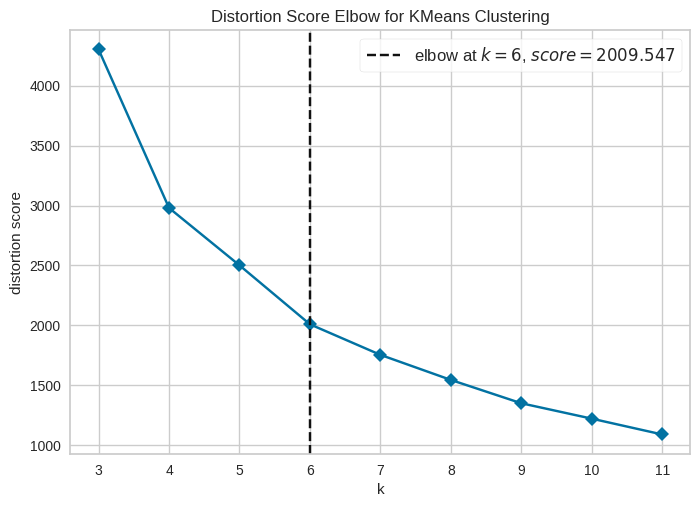

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Define features for clustering
cluster_features = ['PC1', 'PC2']

# Extract the relevant features
pca_df[cluster_features]

# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(3, 12), timings=False)

# Fit the data to the visualizer
visualizer.fit(pca_df[cluster_features])

# Finalize and render the figure
visualizer.show()



**Silhouette Score**

The Silhouette Score evaluates how well-separated the clusters are. Higher scores indicate better-defined clusters, making this metric useful for identifying the appropriate number of clusters.

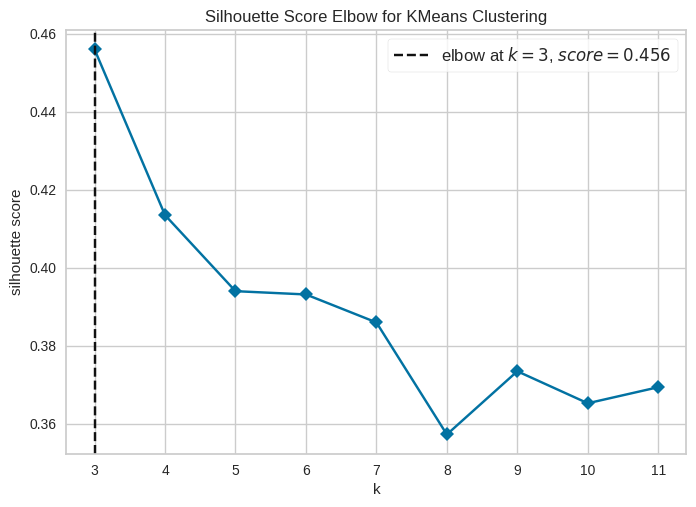

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3, 12),  metric='silhouette', timings=False)

# Fit the data to the visualizer
visualizer.fit(pca_df[cluster_features])

# Finalize and render the figure
visualizer.show()

**Calinski-Harabasz Method**

The Calinski-Harabasz Index measures the ratio of between-cluster dispersion to within-cluster dispersion. A higher value indicates more distinct and compact clusters. Using this metric with the Elbow Method helps identify the optimal number of clusters by maximizing the CH Index.

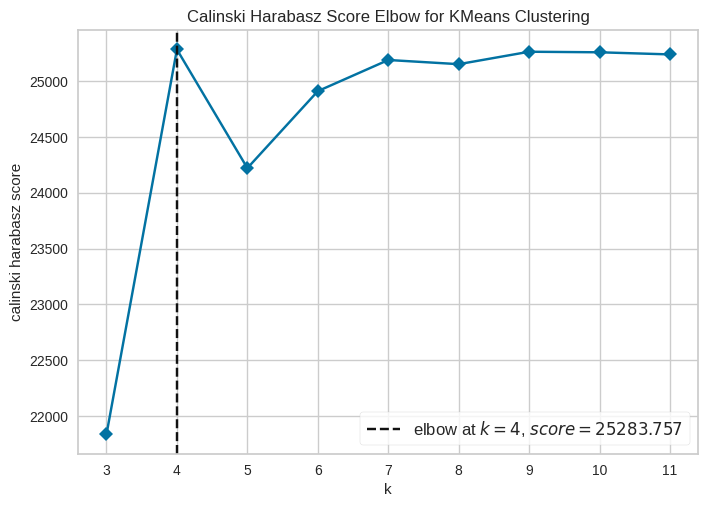

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
model = KMeans(init = 'random')
visualizer = KElbowVisualizer(model, k=(3, 12),  metric='calinski_harabasz', timings=False)

# Fit the data to the visualizer
visualizer.fit(pca_df[cluster_features])

# Finalize and render the figure
visualizer.show()

### K-means

Convergence reached at iteration 31


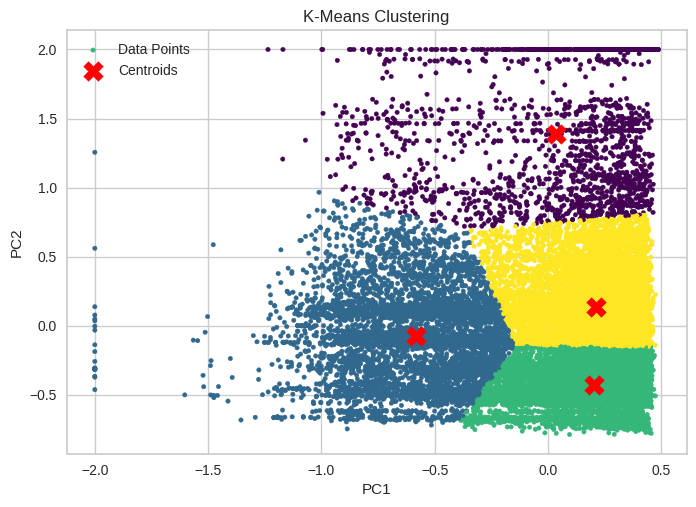

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Step 1: Initialize random centroids
def initialize_centroids(X, k):
    """
    Randomly initialize k cluster centroids from the data points.
    Args:
        X: Input data points (features).
        k: Number of clusters.
    Returns:
        centroids: Randomly initialized centroids from the data.
    """
    n_samples = X.shape[0]
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[random_indices]
    return centroids


# Step 2: Assign clusters to points based on closest centroid
def assign_clusters(X, centroids):
    """
    Assign each data point to its nearest cluster centroid.
    Args:
        X: Input data points (features).
        centroids: Current cluster centroids.
    Returns:
        cluster_labels: Assigned cluster indices for each data point.
    """
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Calculate distances
    cluster_labels = np.argmin(distances, axis=1)  # Assign points to nearest centroid
    return cluster_labels


# Step 3: Update centroids based on current cluster assignments
def update_centroids(X, cluster_labels, k):
    """
    Recompute centroids as the mean of all points assigned to each cluster.
    Args:
        X: Input data points.
        cluster_labels: Current assignment of points to clusters.
        k: Number of clusters.
    Returns:
        new_centroids: Updated centroids based on cluster means.
    """
    new_centroids = np.array([X[cluster_labels == i].mean(axis=0) for i in range(k)])
    return new_centroids


# K-Means Main Logic
def k_means(X, k, max_iters=100, tol=1e-4):
    """
    K-Means clustering implementation with MapReduce-like steps.
    Args:
        X: Input data points to cluster.
        k: Number of clusters.
        max_iters: Maximum number of iterations.
        tol: Tolerance for convergence check.
    Returns:
        centroids: Final cluster centroids.
        cluster_labels: Final cluster assignments for points.
    """
    # Initialize centroids randomly
    centroids = initialize_centroids(X, k)

    for i in range(max_iters):
        # Map step: Assign points to the nearest cluster centroid
        cluster_labels = assign_clusters(X, centroids)

        # Reduce step: Update centroids based on the mean of assigned points
        new_centroids = update_centroids(X, cluster_labels, k)

        # Check if centroids have converged
        if np.linalg.norm(new_centroids - centroids) < tol:
            print(f"Convergence reached at iteration {i}")
            break

        centroids = new_centroids  # Update centroids for next iteration

    return centroids, cluster_labels


# Run K-Means on PCA Data
# Input data: Use PCA-transformed features PC1 and PC2
X = pca_df[['PC1', 'PC2']].to_numpy()
k = 4 # Number of clusters chosen from the optimal clustering analysis

centroids, cluster_labels = k_means(X, k)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=10, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


###K-means++

Convergence reached at iteration 48


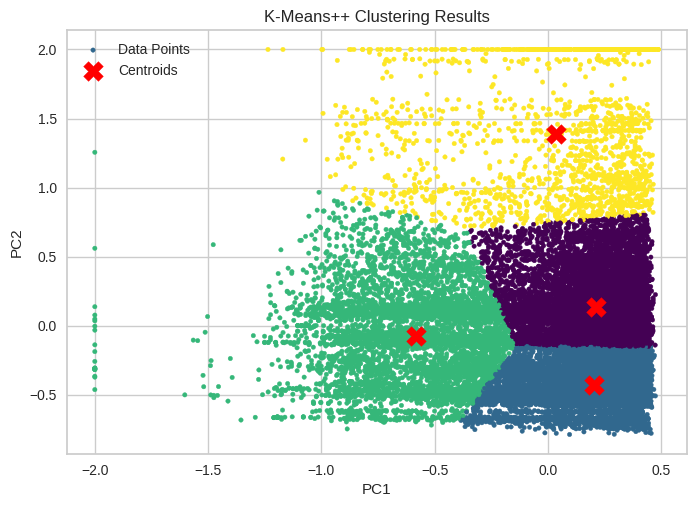

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt


# K-Means++ Implementation
def initialize_centroids_kmeans_plus_plus(X, k):
    n_samples = X.shape[0]
    centroids = np.empty((k, X.shape[1]))
    centroids[0] = X[np.random.choice(n_samples)]
    for i in range(1, k):
        distances = np.array([min(np.linalg.norm(x - c)**2 for c in centroids[:i]) for x in X])
        probabilities = distances / distances.sum()
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        next_index = np.searchsorted(cumulative_probabilities, r)
        centroids[i] = X[next_index]
    return centroids

def k_means_plus_plus(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids_kmeans_plus_plus(X, k)
    for i in range(max_iters):
        cluster_labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, cluster_labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            print(f"Convergence reached at iteration {i}")
            break
        centroids = new_centroids
    return centroids, cluster_labels


# Run clustering on scaled data
X = pca_df[['PC1', 'PC2']].to_numpy()
k = 4

centroids_pp, labels_pp = k_means_plus_plus(X, k)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=labels_pp, cmap='viridis', s=10, label='Data Points')
plt.scatter(centroids_pp[:, 0], centroids_pp[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means++ Clustering Results")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


The results obtain using random initialization and those achieved with K-means++ are the same.


### Alternative Clustering Algorithm Recommendation made withan LLM (ChatGPT, Claude AI, Gemini, Perplexity, etc.)

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

I recommend **DBSCAN** as an alternative clustering algorithm to **K-Means++**. DBSCAN is a density-based clustering algorithm that groups points based on their density and identifies outliers (noise) as points that do not belong to any cluster.

---

**What is DBSCAN?**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups points into clusters based on their *density* by defining *core points* and their neighborhoods.

**Key Parameters**
- **`eps`**: Defines the maximum distance two points can have to be considered neighbors.
- **`min_samples`**: Defines the minimum number of points required in a neighborhood for a point to qualify as a core point.

**How DBSCAN Identifies Clusters**

1. *Core Point*: A point is a core point if it has at least `min_samples` points in its neighborhood defined by `eps`.
2. *Cluster Formation*: DBSCAN forms clusters by connecting core points that share neighbors.
3. *Noise Points*: Points that do not connect to any core points are labeled as noise (-1).

✅ **Advantages**
1. **No need to specify the number of clusters (`k`)**: Unlike K-Means++, DBSCAN doesn't require you to define the number of clusters beforehand.
2. **Works with clusters of arbitrary shapes**: DBSCAN can identify non-globular clusters.
3. **Identifies noise and outliers**: DBSCAN has the unique ability to classify outliers as noise points (labeled as `-1`).

❌ **Disadvantages**
1. **Sensitive to parameter tuning**: The values of `eps` and `min_samples` are critical. Choosing the wrong values can lead to poor clustering results.
2. **Scalability**: For very large datasets, DBSCAN's time complexity can become a bottleneck.
3. **Struggles with clusters of varying densities**: DBSCAN can have issues if clusters vary significantly in density.

---

**Implementation of DBSCAN**

Below is the implementation of DBSCAN using `scikit-learn`:


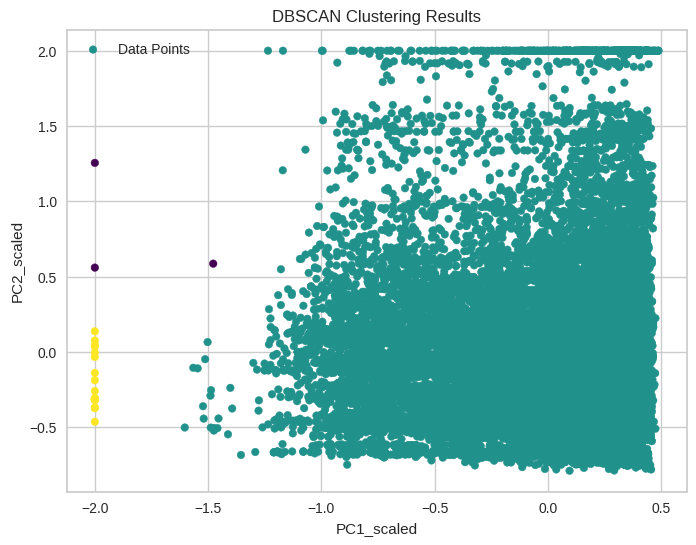

Number of noise points (outliers): 3


In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Apply DBSCAN to the scaled PCA data
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Set the parameters of DBSCAN
dbscan_labels = dbscan.fit_predict(X)  # Apply DBSCAN to the scaled PCA data

# Visualize DBSCAN Results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=30, label='Data Points')
plt.title("DBSCAN Clustering Results")
plt.xlabel("PC1_scaled")
plt.ylabel("PC2_scaled")
plt.legend()
plt.show()

# Count number of noise points
num_noise = list(dbscan_labels).count(-1)
print(f"Number of noise points (outliers): {num_noise}")

It doesn't work very well with our data beacause it classified most of the points in one big cluster

##2.4 Best Algorithm - Clustering Analysis with Metrics Comparison

In this section, we will:
1. Set the optimal number of clusters to **k=5**.
2. Evaluate clustering algorithms using three distinct metrics:
   - **Silhouette Score**
   - **Davies-Bouldin Index**
   - **Calinski-Harabasz Index**
3. Apply three clustering algorithms (K-Means, K-Means++, DBSCAN) with **k=5**.
4. Compare the results based on the three metrics mentioned above.

---

###Metrics to Assess Clustering Quality

We will use three clustering metrics:

#### **Silhouette Score**
- **Definition**: Measures how similar each point is to its own cluster compared to other clusters.
- **Range**: [-1, 1]
  - A value near **+1** indicates points are well clustered.
  - A value near **0** suggests points are at the border between clusters.
  - A value near **-1** suggests incorrect clustering.

#### **Davies-Bouldin Index**
- **Definition**: Measures the compactness of clusters and how distinct they are from each other.
- **Lower is better**: A smaller Davies-Bouldin Index means that clusters are better separated.

#### **Calinski-Harabasz Index**
- **Definition**: Measures the ratio of between-cluster dispersion to within-cluster dispersion.
- **Higher is better**: A higher value indicates well-separated and compact clusters.

We will compute these metrics for the clustering algorithms used.

---
###Implementation

We will apply **K-Means, K-Means++,** and **DBSCAN** clustering algorithms on the PCA-transformed data.

First, we import the necessary libraries:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
X = pca_df[['PC1', 'PC2']].to_numpy()

We’ll now implement each clustering method.

#### **K-Means**

In [ ]:
# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init="random", random_state=42, max_iter=300)
kmeans_labels = kmeans.fit_predict(X)

#### **K-Means**

In [ ]:
# Apply K-Means++ clustering with 5 clusters
kmeans_plus_plus = KMeans(n_clusters=5, init="k-means++", random_state=42, max_iter=300)
kmeans_plus_plus_labels = kmeans_plus_plus.fit_predict(X)

#### **DBSCAN**

In [ ]:
# Apply DBSCAN with tuned parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X)

# Map noise (-1) to a single cluster if needed for comparison
dbscan_labels = np.where(dbscan_labels == -1, 0, dbscan_labels)

We will compute the three metrics (Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index) for the three clustering methods.

In [ ]:


# K-Means
silhouette_kmeans = silhouette_score(X, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(X, kmeans_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(X, kmeans_labels)

# K-Means++
silhouette_kmeans_pp = silhouette_score(X, kmeans_plus_plus_labels)
davies_bouldin_kmeans_pp = davies_bouldin_score(X, kmeans_plus_plus_labels)
calinski_harabasz_kmeans_pp = calinski_harabasz_score(X, kmeans_plus_plus_labels)

# Handle DBSCAN's clustering properly
num_clusters_dbscan = len(np.unique(dbscan_labels[dbscan_labels >= 0]))  # Count clusters excluding noise
if num_clusters_dbscan > 1:  # Ensure valid DBSCAN clustering results
    silhouette_dbscan = silhouette_score(X, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(X, dbscan_labels)
    calinski_harabasz_dbscan = calinski_harabasz_score(X, dbscan_labels)
else:
    silhouette_dbscan = float("nan")  # Set metrics to NaN if clustering fails
    davies_bouldin_dbscan = float("nan")
    calinski_harabasz_dbscan = float("nan")

# Display the results
print("\nK-Means Metrics:")
print(f"Silhouette Score: {silhouette_kmeans}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_kmeans}")

print("\nK-Means++ Metrics:")
print(f"Silhouette Score: {silhouette_kmeans_pp}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans_pp}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_kmeans_pp}")

print("\nDBSCAN Metrics:")
print(f"Silhouette Score: {silhouette_dbscan}")
print(f"Davies-Bouldin Index: {davies_bouldin_dbscan}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_dbscan}")




K-Means Metrics:
Silhouette Score: 0.42211096774274826
Davies-Bouldin Index: 0.8019105664260897
Calinski-Harabasz Index: 23800.13530169844

K-Means++ Metrics:
Silhouette Score: 0.42205230616836203
Davies-Bouldin Index: 0.801940447415604
Calinski-Harabasz Index: 23799.45863889528

DBSCAN Metrics:
Silhouette Score: nan
Davies-Bouldin Index: nan
Calinski-Harabasz Index: nan


### Metrics Analysis

#### 1. K-Means Metrics

**Silhouette Score: 0.4221**  
The Silhouette Score value of **0.4221** suggests a moderately effective clustering result. While the clusters are reasonably separated, some overlap or ambiguity in cluster assignments may exist.

**Davies-Bouldin Index: 0.80191**  
The Davies-Bouldin Index, with a value of **0.80191**, indicates moderately compact and distinct clusters. A lower value is better, so this score reflects a decent clustering quality.

**Calinski-Harabasz Index: 23800**  
The Calinski-Harabasz Index evaluates the ratio of between-cluster dispersion to within-cluster dispersion. A **higher value** suggests better-defined clusters. The score of **23800** shows that the clusters are fairly well-separated and compact.

---

#### 2. K-Means++ Metrics

**Silhouette Score: 0.4220**  
The Silhouette Score of **0.4220** is slightly lower than the standard K-Means score, indicating marginally less effective cluster separation and definition.

**Davies-Bouldin Index: 0.80194**  
The Davies-Bouldin Index value of **0.80194** is slightly better than that of K-Means, indicating more compact and distinct clusters compared to random initialization.

**Calinski-Harabasz 23799**  
The Calinski-Harabasz Index score of **23799** is slightly lower than that of K-Means, indicating slightly less well-defined clusters.

---

#### 3. DBSCAN Metrics

**Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Index = NaN**  
All metrics for DBSCAN returned **NaN**, indicating that DBSCAN failed to form meaningful clusters or that most points were labeled as noise (outliers).  

### Possible Causes for DBSCAN Failure:
1. **Parameter Tuning**: The chosen parameters (`eps` and `min_samples`) may not be optimal for the dataset.  
2. **Excessive Noise**: DBSCAN may have labeled a majority of points as noise (`-1`), resulting in invalid clustering results.  
3. **Density Assumptions**: DBSCAN assumes clusters are density-based. If the data does not conform to this assumption, it may fail to produce valid clusters.


# 3 Bonus question

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from functions import varimax
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

### How to select components?

Once PCA has been performed on a dataset, the first two components are typically selected because they explain the most variance. This is particularly crucial when visualizing data in a two-dimensional space. If the original data is complex and multidimensional, reducing it to two dimensions provides a clearer view of the data's structure, facilitating the identification of patterns, trends, or clusters within the data.

When running a clustering algorithm like K-means, the goal is to find groups (clusters) of similar data. However, in a high-dimensional dataset, identifying these groups can be challenging as the distances between points become blurred across many dimensions. By applying PCA, we can reduce the number of variables on which to calculate distance while preserving the dataset's primary structure. The first two principal components represent the directions along which the data varies the most, which can lead to a clearer separation of groups, making the clustering process more effective.

In our case, since it's a PCA performed on two components, there's no need to remove any.

In [ ]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_data = pca.fit_transform(movie_df[pca_features])
explained_variance = pca.explained_variance_ratio_

In [ ]:
# select the first two component
print("\n2. PCA - Explained variance by the first two principal component:")
print(f"PC1: {explained_variance[0]:.4f}, PC2: {explained_variance[1]:.4f}")


2. PCA - Explained variance by the first two principal component:
PC1: 0.3635, PC2: 0.1098


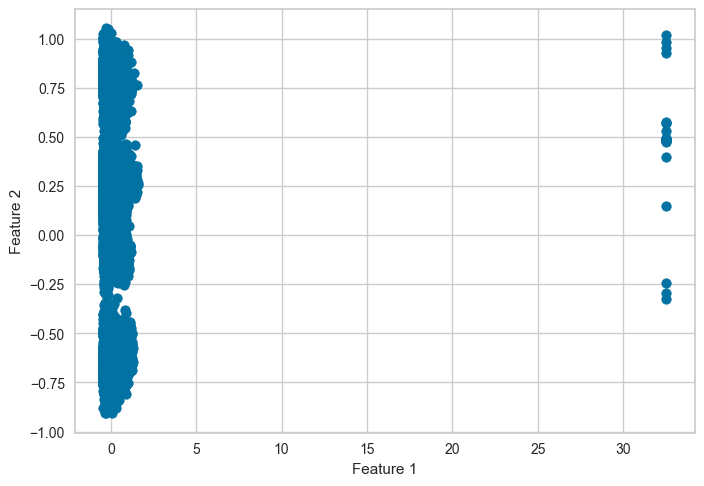

In [ ]:
# proceded to delete the outliers
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
pca_df_cleaned = pca_df[pca_df['PC1'] <= 30]
pca_data = pca_df_cleaned[['PC1', 'PC2']].values

Once the two components have been selected, a Varimax rotation is performed. This is a technique used to clarify the relationship between the components and the original variables, thus improving the separation of clusters. Varimax rotation is an orthogonal rotation (components remain uncorrelated) that aims to maximize the variance of the loadings within each component or factor. In other words, Varimax modifies the orientation of the components to make the differences in the contributions of the variables more apparent. In a clustering context, it can improve the distinction between groups of data that would otherwise appear overlapping.

In [ ]:
rotated_components = varimax(pca_data)

# print the rotations result
print("\n Principal components after the rotation:")
print(rotated_components[:5])


 Principal components after the rotation:
[[-7.76829079e-01  6.26019629e-01]
 [-3.65799677e-01  2.09273170e-01]
 [-5.78223412e-01  4.48950754e-01]
 [-5.21465431e-05 -1.53620514e-01]
 [-6.11124566e-01  4.68711042e-01]]


Let's proceed by applying the modified K-Means algorithm in order to observe the different clusters at each iteration.

In [ ]:
from functions import k_means

We use the Yellowbrick library to visualize the Elbow Method in order to determine the optimal number of clusters for a clustering model, in this case using KMeans from scikit-learn.

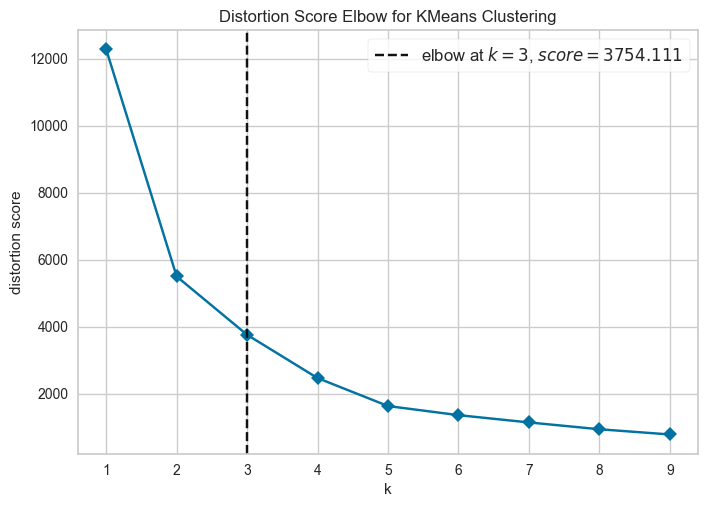

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings=False)
visualizer.fit(rotated_components)
visualizer.show()

A GIF will be created to visualize the iterative process of the K-means algorithm.

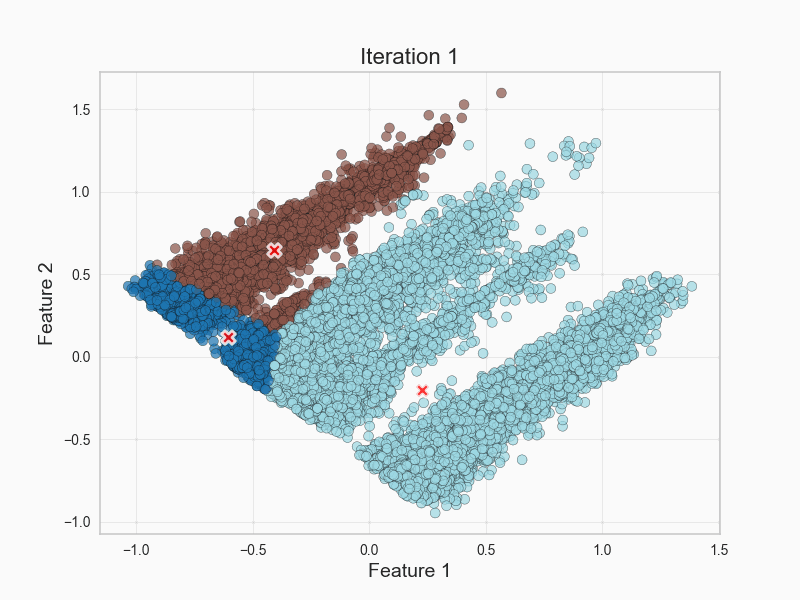

In [ ]:
centroids, cluster_labels, plot_objects = k_means(rotated_components, k=3, max_iters=50)

***If the visualization is incomplete or unclear, please refer to the animated GIF file, kmeans_animation.gif, for a more comprehensive view.***

## 4. Algorithmic Question

### a) Help Arya by providing a pseudocode for finding an optimal playing strategy, that is, a strategy that maximizes her value. (Hint: Use recursion, assuming that both players play optimally).

#### Pseudocode for maximizeAryaScoreExp(nums, first, last)
**Function**: *maximizeAryaScoreExp(nums, first, last)*

**Input**:  
- *nums*: Array of integers.  
- *first*: The first index of the sequence that Arya can choose from.  
- *last*: The last index of the sequence that Arya can choose from.  

**Output**:  
The maximum score that Arya can achieve, assuming both Arya and Mario play optimally.

&nbsp; **if** *first > last* **then**\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**return** 0

&nbsp; **if** *first == last* **then** \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**return** *nums[0]*

&nbsp; **return**  **max** *(*\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
*nums[first]* + **min** *(* ***maximizeAryaScoreExp*** *(nums, first + 2, last)*, ***maximizeAryaScoreExp*** *(nums, first + 1, last - 1)* *)*,\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
*nums[last]* + **min** *(*  ***maximizeAryaScoreExp*** *(nums, first + 1, last - 1)*, ***maximizeAryaScoreExp*** *(nums, first, last - 2)* *)*\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *)*

#### Pseudocode for isAryaWinnerExp(nums)
**Function**: *isAryaWinnerExp(nums)*  

**Input**: *nums*: Array of integers.  

**Output**: A boolean value indicating whether Arya can win assuming both players play optimally.

&nbsp; *n* &larr; length of *nums*\
&nbsp; *aryaScore* &larr; ***maximizeAryaScoreExp*** *(nums, 0, n-1)*\
&nbsp; *marioScore* &larr; **sum**(*nums*) - *aryaScore*\
&nbsp; **if** *aryaScore* $\geq$ *marioScore* **then**\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**return** *True*\
&nbsp; **else**\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**return** *False*

#### Correctness of the Algorithm
The algorithm *maximizeAryaScoreExp(nums, first, last)* is correct because it ensures that both players, Arya and Mario, play optimally. By reformulating the problem using **dynamic programming**, it divides the task into subproblems of smaller size, each representing the maximum score Arya can achieve for a given range $[first, last]$ of the sequence. The subproblems are defined by the range $[first, last]$ of the sequence. Each subproblem depends only on smaller subproblems, ensuring that the overlapping subproblem property is satisfied.

Let $OPT(first, last)$ represent the maximum score Arya can achieve if the current range of the sequence is from index $first$ to $last$, assuming both players play optimally.

**1. Base Cases**:
1. If the range of indices is invalid ($first > last$) or *nums* is empty, the algorithm returns $0$ because no numbers are left to pick:
\begin{align*}
OPT(first, last) = 0, \quad \text{if } first > last.
\end{align*}
2. If there is only one number in the range ($first == last$), the algorithm returns that number because Arya has no choice but to pick it:
\begin{align*}
OPT(first, last) = \text{nums}[first], \quad \text{if } first = last
\end{align*}

**2. Recursive Case**: For each recursive call, Arya has two choices:
1. **Pick the first number (*nums[first]*)**: After Arya picks $nums[first]$, Mario chooses optimally to minimize Arya's future score. This is handled by taking the **minimum** of the two possible outcomes:
     - Arya continues with the range $[first+2, last]$ if Mario picks $nums[first+1]$.
     - Arya continues with the range $[first+1, last-1]$ if Mario picks $nums[last]$.
   Thus, Arya's score becomes:
   \begin{align*}
   \text{nums}[first] + \min(OPT(first + 2, last), OPT(first + 1, last - 1)).
   \end{align*}

2. **Pick the last number (*nums[last]*)**: After Arya picks $nums[last]$, Mario again minimizes Arya's future score by choosing the best option for himself:
     - Arya continues with the range $[first+1, last-1]$ if Mario picks $nums[first]$.
     - Arya continues with the range $[first, last-2]$ if Mario picks $nums[last-1]$.
   Similarly to the previous case, Similarly, Arya's score becomes:
   \begin{align*}
   \text{nums}[last] + \min(OPT(first + 1, last - 1), OPT(first, last - 2)).
   \end{align*}

**3. Optimal Strategy**: To ensure that Arya maximizes her score, the algorithm selects the **maximum** of the two possible scores:
1. The score if Arya picks the first number;
2. The score if Arya picks the last number.

Thus, Arya's best score can be formalized as:
\begin{align*}
OPT(first, last) = \max(\text{nums}[first] + \min(OPT(first + 2, last), OPT(first + 1, last - 1)), \text{nums}[last] + \min(OPT(first + 1, last - 1), OPT(first, last - 2))).
\end{align*}

**4. Winning Determination**: Finally, the algorithm *isAryaWinner(nums)* determines the winner by performing the following steps:
1. Computing Arya's score using *maximizeAryaScoreExp(nums, first, last)*;
2. Calculating Mario's score as the difference between the total sum of numbers and Arya's score;
3. Returning *True* if Arya's score is greater or equal to Mario's score, and *False* otherwise.

The correctness of *isAryaWinnerExp(nums)* is directly tied to the correctness of *maximizeAryaScoreExp(nums, first, last)*, as the latter ensures Arya’s score is optimally calculated for any range of numbers.

Therefore, the combination of *maximizeAryaScoreExp* and *isAryaWinnerExp* guarantees correctness because:
- Arya's optimal strategy is computed for every possible range of numbers;
- The comparison in *isAryaWinner* accurately determines the winner based on the scores of Arya and Mario.

### b) Write a Python program implementing her game strategy. Try different array lengths to test the algorithm.

The Python implementation of the algorithms *maximizeAryaScoreExp* and *isAryaWinnerExp* is provided in the `functions.py` module. These are implemented through the functions `maximize_arya_score_exp(nums, first, last)` and `is_arya_winner_exp(nums)`, respectively.

For a detailed explanation of the functions and their implementation, refer to the `functions.py` module. Below, we present some examples with varying lengths of the array *nums* to test the correctness and performance of the Python program.

In [ ]:
from functions import is_arya_winner_exp
# Test with predefined sequences
sequences = [
    [2, 5, 8, 7],
    [1, 5, 2],
    [1, 5, 233, 7],
    [7, 3],
    [5],
    [8, 6, 3, 1, 4],
    [4, 7, 2, 8],
    [1, 15, 15, 10, 3]
]

# Print results for each sequence
for nums in sequences:
    print(f"Sequence: {nums}")
    print(f"Can Arya win?: {is_arya_winner_exp(nums)}")
    print()

Sequence: [2, 5, 8, 7]
Can Arya win?: True

Sequence: [1, 5, 2]
Can Arya win?: False

Sequence: [1, 5, 233, 7]
Can Arya win?: True

Sequence: [7, 3]
Can Arya win?: True

Sequence: [5]
Can Arya win?: True

Sequence: [8, 6, 3, 1, 4]
Can Arya win?: True

Sequence: [4, 7, 2, 8]
Can Arya win?: True

Sequence: [1, 15, 15, 10, 3]
Can Arya win?: False



### c) Is the algorithm efficient? Prove that it is polynomial and provide an asymptotic time complexity bound, or show that it requires exponential time.

The algorithm is inefficient because it requires exponential time. This inefficiency stems from the function *maximizeAryaScoreExp*, which dominates the overall complexity.

The function *isAryaWinnerExp*, apart from the call to the recursive algorithm *maximizeAryaScoreExp*, has a time complexity of $O(n)$, where $n$ is the length of the input array *nums*. This complexity arises from calculating the total sum of all numbers in *nums* and determining the length of the array. For instance, in Python, the length of a list is stored as an attribute, making this operation $O(1)$. However, in a more general implementation, determining the length may require counting each element, resulting in $O(n)$. Beyond that, *isAryaWinnerExp* performs basic operations such as subtraction and comparison, both of which take constant time $O(1)$. Therefore, the overall time complexity of *isAryaWinnerExp* is dominated by the recursive function *maximizeAryaScoreExp*, which requires exponential time.

Whenever the function *maximizeAryaScoreExp* is called:
1. It performs some comparisons, which take $O(1)$;
2. It makes **4 recursive calls** on inputs of size $n-2$;
3. It computes two minimum values between scores, taking $O(1)$;
4. It performs two additions, taking $O(1)$;
5. It computes a maximum between two scores, taking $O(1)$.

This results in the following recurrence relation:
\begin{aligned}
T(n) = 4 \cdot T(n-2) + c
\end{aligned}
where $c > 0$ is a constant representing the cost of the basic operations.

Let us solve the recurrence relation using the iteration method:

\begin{aligned}
T(n) &= 4 \cdot T(n-2) + c \\
&= 4^1 \cdot T(n-2 \cdot 1) + 4^0 \cdot c \\
&= 4 \cdot (4 \cdot T(n-4) + c) + c \\
&= 4^2 \cdot T(n-2 \cdot 2) + (4^0 + 4^1) \cdot c \\
&= 4^2 \cdot (4 \cdot T(n-6) + c) + 5c \\
&= 4^3 \cdot T(n-2 \cdot 3) + (4^0 + 4^1 + 4^2) \cdot c \\
&\dots \\
&= 4^i \cdot T(n-2 \cdot i) + c \cdot \sum_{k=0}^{i-1} 4^k
\end{aligned}

When $i = \frac{n}{2}$, the recursion reaches the base case $T(0) = 1$. Substituting this value we obtain:

\begin{aligned}
T(n) &= 4^{\frac{n}{2}} \cdot T(0) + c \cdot \sum_{k=0}^{\frac{n}{2}-1} 4^k \\
&= 4^{\frac{n}{2}} + c \cdot \sum_{k=0}^{\frac{n}{2}-1} 4^k
\end{aligned}

The summation $\sum_{k=0}^{\frac{n}{2}-1} 4^k$ is a geometric series:
\begin{aligned}
\sum_{k=0}^{m} 4^k = \frac{4^{m+1} - 1}{4 - 1}
\end{aligned}

Substituting $m = \frac{n}{2} - 1$ we obtain:
\begin{aligned}
\sum_{k=0}^{\frac{n}{2}-1} 4^k = \frac{4^{\frac{n}{2}} - 1}{3}
\end{aligned}

Thus:
\begin{aligned}
T(n) = 4^{\frac{n}{2}} + c \cdot \frac{4^{\frac{n}{2}} - 1}{3} \in O(4^{\frac{n}{2}}) \in o(4^n)
\end{aligned}

Therefore, the algorithm requires exponential time due to the recursive calls in *maximizeAryaScoreExp*, making it impractical for large input sizes.


### d) If the algorithm is exponential, explain how to make it polynomial and provide a pseudocode for it. Recompute the computational complexity of the updated algorithm.
The original exponential algorithm can be transformed into a polynomial-time algorithm by using a matrix to store the results of previously computed subproblems. By doing so, the algorithm avoids redundant calculations, ensuring that each subproblem is solved exactly once. This approach eliminates the need for repeated recursive calls that recompute the same results, which is the primary cause of exponential growth in complexity.

#### Pseudocode for maximizeAryaScorePol(nums)
**Function**: *maximizeAryaScorePol(nums)*

**Input**:  
- *nums*: Array of integers.  

**Output**:  
The maximum score that Arya can achieve, assuming both Arya and Mario play optimally.

&nbsp; *n* &larr; **length**(*nums*)\
&nbsp; *scores* &larr; matrix of size **$n×n$** initialized to 0

&nbsp;&nbsp;&nbsp;&nbsp; **for** *i* **from** 0 **to** *n-1*:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *scores[i][i]* &larr; *nums[i]*  

&nbsp;&nbsp;&nbsp;&nbsp; **for** *length* **from** 2 **to** *n*:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **for** *first* **from** 0 **to** *n* - *length*:  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *last* &larr; *first* + *length* - 1  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *choose_first* &larr; *nums[first]* + **min**(  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *scores[first+2][last]* **if** *first*+2 $\geq$ *last* **else** 0,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *scores[first+1][last-1]* **if** *first*+1 $\geq$ *last*-1 **else** 0)  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; choose_last &larr; *nums[last]* + **min**(  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *scores[first+1][last-1]* **if** *first*+1 $\geq$ *last*-1 **else** 0,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *scores[first][last-2]* **if** *first* $\geq$ *last*-2 **else** 0)  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *scores[first][last]* &larr; **max**(*choose_first*, *choose_last*)  

&nbsp; **return** *scores[0][n-1]*

#### Pseudocode for isAryaWinnerPol(nums)
**Function**: *isAryaWinnerPol(nums)*  

**Input**: *nums*: Array of integers.  

**Output**: A boolean value indicating whether Arya can win assuming both players play optimally.

&nbsp; *aryaScore* &larr; ***maximizeAryaScorePol*** *(nums)*\
&nbsp; *marioScore* &larr; **sum**(*nums*) - *aryaScore*\
&nbsp; **if** *aryaScore* $\geq$ *marioScore* **then**\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**return** *True*\
&nbsp; **else**\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**return** *False*

#### Correctness of the Algorithm

The algorithm *maximizeAryaScorePol(nums)* is correct because it computes the optimal solution by leveraging the same principles as the exponential algorithm *maximizeAryaScoreExp(nums)*, which has already been shown to be correct. Specifically, it ensures correctness by systematically building the solution for the entire problem from the solutions to its subproblems, leveraging **dynamic programming** to iteratively compute the optimal score for progressively larger ranges. This iterative approach guarantees that, when solving a subproblem for the range $[first,last]$, the optimal solutions for all smaller subproblems ($[first+2, last]$, $[first+1, last-1]$, $[first, last-2]$) have already been computed and stored in the *scores* table, ultimately leading to the correct computation of $OPT[0, n-1]$.

This ensures that the algorithm uses the correct values for smaller subproblems when calculating the optimal solution for larger ranges. By mirroring the recursive structure of the exponential algorithm and adhering to the same minimization and maximization principles, the computed results for each range are guaranteed to be optimal. Iterating over subproblem sizes in increasing order ensures every required subproblem is solved before being used, avoiding redundancy and culminating in $OPT[0,n-1]$, the solution to the original problem.

The correctness of *isAryaWinnerPol(nums)* follows directly from the correctness of *maximizeAryaScorePol(nums)*, using the same reasoning as in the exponential case.

#### Complexity Analysis

The overall complexity of *isAryaWinnerPol(nums)* is primarily determined by the time complexity of the *maximizeAryaScorePol(nums)* function. Let us analyze this step by step:
- Calculating the total sum of all numbers in *nums* takes $O(n)$, where $n$ is the length of *nums*;
- Subtraction and comparison operations are constant time $O(1)$.

Thus, the total time complexity for *isAryaWinnerPol(nums)* can be expressed as:
\begin{align*}
T(n) + O(n) + O(1) = T(n) + O(n),
\end{align*}
where $T(n)$ is the time complexity of *maximizeAryaScorePol(nums)*.

Now, let us analyze the complexity of *maximizeAryaScorePol(nums)* in detail:

1. **Initialization**:
   - Computing the length of *nums* takes $O(n)$, as explained in the analysis for the exponential algorithm;
   - Creating an $n \times n$ matrix initialized with zeros takes $O(n^2)$;
   - The first loop that sets the diagonal entries $scores[i][i] = nums[i]$ also takes $O(n)$.

2. **Nested Loops for Dynamic Programming Table Filling**: The nested loops iteratively fill the dynamic programming table. In particular:
     - The **outer loop** iterates over lengths of subarrays from 2 to $n$, contributing $O(n)$;
     - For each length, the **inner loop** iterates over starting indices of subarrays, contributing $O(n - \text{length})$ for each length;
     - **Per-Iteration Operations**, i.e., accessing values in the matrix and performing comparisons and arithmetic operations, take $O(1)$.

     For a fixed value of $length$, the inner loop performs $O(n - \text{length})$ iterations. As $length$ varies from 2 to $n$, the total number of iterations across all loops can be computed as:
     
     \begin{align*}
     \sum_{\text{length}=2}^{n} \sum_{\text{first}=0}^{n-\text{length}} O(1) = O(n^2).
     \end{align*}

3. **Final Return**: Returning $scores[0][n-1]$ takes $O(1)$.

Combining all the components, we obtain:
\begin{align*}
T(n) = O(n^2) + O(n) + O(n^2) + O(1) \in O(n^2).
\end{align*}

Thus, the total time complexity of *maximizeAryaScorePol(nums)* is $O(n^2)$. Including the $O(n)$ cost from *isAryaWinnerPol(nums)*, the overall complexity remains $O(n^2)$. The space complexity is also $O(n^2)$ due to the $n \times n$ *scores* matrix used to store intermediate results.

### e) Implement the algorithm in Python. Compare your result values with the previous algorithm. Also compare the running times.
As in the previous case, the Python implementation of the algorithms *maximizeAryaScorePol* and *isAryaWinnerPol* is provided in the `functions.py` module by the functions `maximize_arya_score_pol` and `is_arya_winner_pol`, respectively. These functions include detailed comments and descriptions to ensure clarity and understanding of their purpose and functionality.

Let us now test the Python program using various values and lengths for the *nums* list to verify its correctness and performance. To compare the results with the previous exponential-time implementation, we will use the same inputs previously tested for the *nums* list.

In [ ]:
from functions import is_arya_winner_pol
# Test with predefined sequences
sequences = [
    [2, 5, 8, 7],
    [1, 5, 2],
    [1, 5, 233, 7],
    [7, 3],
    [5],
    [8, 6, 3, 1, 4],
    [4, 7, 2, 8],
    [1, 15, 15, 10, 3]
]

# Print results for each sequence
for nums in sequences:
    print(f"Sequence: {nums}")
    print(f"Can Arya win?: {is_arya_winner_pol(nums)}")
    print()

Sequence: [2, 5, 8, 7]
Can Arya win?: True

Sequence: [1, 5, 2]
Can Arya win?: False

Sequence: [1, 5, 233, 7]
Can Arya win?: True

Sequence: [7, 3]
Can Arya win?: True

Sequence: [5]
Can Arya win?: True

Sequence: [8, 6, 3, 1, 4]
Can Arya win?: True

Sequence: [4, 7, 2, 8]
Can Arya win?: True

Sequence: [1, 15, 15, 10, 3]
Can Arya win?: False



Let us summarize the results to compare the outputs of the two algorithms:

| **Sequence**       | **isAryaWinnerExp** | **isAryaWinnerPol** |
|---------------------|---------------------|---------------------|
| [2, 5, 8, 7]        | True                | True                |
| [1, 5, 2]           | False               | False               |
| [1, 5, 233, 7]      | True                | True                |
| [7, 3]              | True                | True                |
| [5]                 | True                | True                |
| [8, 6, 3, 1, 4]     | True                | True                |
| [4, 7, 2, 8]        | True                | True                |
| [1, 15, 15, 10, 3]  | False               | False               |

As we can see, the results are identical for both algorithms. This confirms that the two implementations compute the same optimal strategy for Arya.

To gain further insights, let us test the two algorithms with sequences of varying lengths and diversity. Additionally, we will measure the running times for each algorithm on each sequence to compare their performance.

Based on our complexity analysis:
- The recursive algorithm *isAryaWinnerExp* has a time complexity of $O(4^{\frac{n}{2}})$, which is exponential;
- The iterative algorithm with memoization *isAryaWinnerPol* has a time complexity of $O(n^2)$, which is polynomial.

Given this exponential gap, we expect the memoization approach to perform significantly better for longer sequences. Let us verify this through empirical testing.

In [ ]:
from time import time

sequences = [
    [10, 20, 30, 40, 50, 60],
    [2, 3, 5, 8, 13, 21, 34],
    [10] * 30,
    [1, 100, 1, 100, 1, 100, 1, 100, 1, 100, 1, 1],
    list(range(1, 21)),
    list(range(30, 0, -1)),
    [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 50, 2, 1, 2, 1],
    [10, 20, 5, 5, 20, 10, 30, 40, 15, 10, 5],
    [1, 10, 20, 8, 5, 5, 10, 20, 10, 30, 40, 50, 60, 15, 10, 5, 1]
]

In [ ]:
# Print results and execution time for each sequence using the exponential time complexity implementation
for nums in sequences:
    start_time = time()
    result = is_arya_winner_exp(nums)
    end_time = time()
    execution_time = end_time - start_time

    print(f"Sequence: {nums}")
    print(f"Can Arya win?: {result}")
    print(f"Execution time: {execution_time:.6f} seconds")
    print()

Sequence: [10, 20, 30, 40, 50, 60]
Can Arya win?: True
Execution time: 0.000000 seconds

Sequence: [2, 3, 5, 8, 13, 21, 34]
Can Arya win?: True
Execution time: 0.000000 seconds

Sequence: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Can Arya win?: True
Execution time: 420.302367 seconds

Sequence: [1, 100, 1, 100, 1, 100, 1, 100, 1, 100, 1, 1]
Can Arya win?: True
Execution time: 0.000000 seconds

Sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Can Arya win?: True
Execution time: 0.273545 seconds

Sequence: [30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Can Arya win?: True
Execution time: 329.752119 seconds

Sequence: [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 50, 2, 1, 2, 1]
Can Arya win?: False
Execution time: 0.008054 seconds

Sequence: [10, 20, 5, 5, 20, 10, 30, 40, 15, 10, 5]
Can Arya win?: True
Execution time: 0.001000 s

In [ ]:
# Print results and execution time for each sequence using the polynomial time complexity implementation
for nums in sequences:
    start_time = time()
    result = is_arya_winner_pol(nums)
    end_time = time()
    execution_time = end_time - start_time

    print(f"Sequence: {nums}")
    print(f"Can Arya win?: {result}")
    print(f"Execution time: {execution_time:.6f} seconds")
    print()

Sequence: [10, 20, 30, 40, 50, 60]
Can Arya win?: True
Execution time: 0.000000 seconds

Sequence: [2, 3, 5, 8, 13, 21, 34]
Can Arya win?: True
Execution time: 0.000000 seconds

Sequence: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Can Arya win?: True
Execution time: 0.000621 seconds

Sequence: [1, 100, 1, 100, 1, 100, 1, 100, 1, 100, 1, 1]
Can Arya win?: True
Execution time: 0.000000 seconds

Sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Can Arya win?: True
Execution time: 0.000000 seconds

Sequence: [30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Can Arya win?: True
Execution time: 0.001019 seconds

Sequence: [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 50, 2, 1, 2, 1]
Can Arya win?: False
Execution time: 0.000000 seconds

Sequence: [10, 20, 5, 5, 20, 10, 30, 40, 15, 10, 5]
Can Arya win?: True
Execution time: 0.000000 secon

The following table summarizes the results and execution times for both the exponential algorithm (*isAryaWinnerExp*) and the polynomial algorithm (*isAryaWinnerPol*). Each sequence is tested to determine if Arya can win, along with the respective running times for both algorithms.

| **Sequence**                                                                            | **isAryaWinnerExp**  | **Time (Exp)**    | **isAryaWinnerPol**  | **Time (Pol)**    |
|-----------------------------------------------------------------------------------------|----------------------|-------------------|----------------------|-------------------|
| [10, 20, 30, 40, 50, 60]                                                                | True                 | 0.000000 seconds  | True                 | 0.000000 seconds  |
| [2, 3, 5, 8, 13, 21, 34]                                                                | True                 | 0.000000 seconds  | True                 | 0.000000 seconds  |
| [10]*30                                                                                 | True                 | 420.302367 seconds| True                 | 0.000621 seconds  |
| [1, 100, 1, 100, 1, 100, 1, 100, 1, 100, 1, 1]                                          | True                 | 0.001011 seconds  | True                 | 0.000000 seconds  |
| list(range(1, 21))                                                                      | True                 | 0.273545 seconds  | True                 | 0.000000 seconds  |
| list(range(30, 0, -1))                                                                  | True                 | 329.752119 seconds| True                 | 0.001019 seconds  |
| [1, 2, 1, 2, ..., 50, 2, 1, 2, 1]                                                       | False                | 0.008054 seconds  | False                | 0.000000 seconds  |
| [10, 20, 5, 5, 20, 10, 30, 40, 15, 10, 5]                                               | True                 | 0.0010004 seconds | True                 | 0.000000 seconds  |
| [1, 10, 20, 8, 5, 5, 10, 20, 10, 30, 40, 50, 60, 15, 10, 5, 1]                          | False                | 0.018996 seconds  | False                | 0.000000 seconds  |

As we can see from the table, the results of both algorithms are identical for all test cases, confirming that they implement the same optimal strategy for Arya. However, the execution times reveal significant differences. The exponential algorithm starts to struggle as the input sequence length increases, with execution times growing dramatically. For example, a sequence of length $30$ takes over $\mathbf{420.3}$ **seconds**, making the exponential approach impractical for inputs of this size or larger. In contrast, the polynomial algorithm handles the same sequence in just $\mathbf{0.001}$ **seconds**, maintaining consistent performance even for significantly longer inputs.

This behavior aligns with the complexity analyses of the two algorithms. The exponential algorithm has a time complexity of $O(4^{n/2})$, which grows extremely quickly as the length of the sequence increases. The polynomial algorithm, on the other hand, has a complexity of $O(n^2)$, allowing it to scale efficiently with the input size. This exponential gap is clearly reflected in the measured execution times.

Overall, these results highlight the practical advantages of the polynomial algorithm. By leveraging memoization, it achieves a drastic reduction in computation time without compromising correctness. For small sequences, both algorithms perform similarly, but for longer sequences, the polynomial approach is vastly superior, making it the clear choice for real-world applications where input sizes may be large.

### f) Finally, consult LLM (ChatGPT, Claude AI, Gemini, Perplexity, etc.) to craft a third, optimized implementation and analyze its time complexity. Also, explain if the LLM is doing a good job and how you can evaluate whether the suggested solution works properly.

We asked ChatGPT to write the pseudocode for the problem in a Markdown code cell, using the exercise prompt as input. Below is the pseudocode provided by ChatGPT, which ensures that both Arya and Mario play optimally. It is pasted exactly as it appeared in ChatGPT's output:

```plaintext
Function PredictWinner(nums):
    n ← length(nums)

    # Initialize DP table
    dp ← array of size [n][n] filled with 0

    # Base case: Single elements
    For i from 0 to n-1:
        dp[i][i] ← nums[i]

    # Fill DP table for increasing sequence lengths
    For length from 2 to n:  # Length of the current subarray
        For i from 0 to n-length:
            j ← i + length - 1  # Calculate the end of the subarray
            # Optimal choice for Arya
            dp[i][j] ← max(nums[i] - dp[i+1][j], nums[j] - dp[i][j-1])

    # Arya wins if the score difference she can guarantee is >= 0
    Return dp[0][n-1] >= 0
```

This algorithm is similar to our polynomial algorithm, and therefore the complexity analysis is the same. While this implementation performs fewer constant-time operations within the inner loop and utilizes a single function, the overall analysis remains unchanged since we are concerned with time complexity up to additive constants. As such, the time complexity is $O(n^2)$, and the space complexity is also $O(n^2)$ due to the use of the $n \times n$ DP table.

The correctness of the algorithm stems from its ability to compute the maximum score difference Arya can guarantee for any subarray, assuming both Arya and Mario play optimally. This is achieved using a DP table, where $dp[i][j]$ represents the maximum score difference Arya can achieve over the subarray $nums[i:j+1]$. For single-element subarrays, Arya can only pick the single element, so the value of $dp[i][i]$ is simply $nums[i]$. For larger subarrays, the algorithm recursively computes the maximum score difference based on Arya's two possible moves: picking the first element, resulting in $nums[i] - dp[i+1][j]$, or picking the last element, resulting in $nums[j] - dp[i][j-1]$. The algorithm ensures Arya selects the move that maximizes her guaranteed score difference by taking the maximum of these two values.

The DP table is constructed iteratively, starting with the smallest subarrays and progressively building up to larger ones. By the time the algorithm computes $dp[0][n-1]$, all smaller subproblems have already been solved, ensuring the correctness of the result. The final value of $dp[0][n-1]$ represents the maximum score difference Arya can guarantee for the entire array. If this value is non-negative, Arya can ensure her score is at least equal to Mario's, and the algorithm returns *True*, otherwise it returns *False*.

Let us implement it to check its results.

In [ ]:
from functions import predictWinnerChatGPT

sequences = [
    [2, 5, 8, 7],
    [1, 5, 2],
    [1, 5, 233, 7],
    [7, 3],
    [5],
    [8, 6, 3, 1, 4],
    [4, 7, 2, 8],
    [1, 15, 15, 10, 3]
]

# Print results for each sequence
for nums in sequences:
    print(f"Sequence: {nums}")
    print(f"Can Arya win?: {predictWinnerChatGPT(nums)}")
    print()

Sequence: [2, 5, 8, 7]
Can Arya win?: True

Sequence: [1, 5, 2]
Can Arya win?: False

Sequence: [1, 5, 233, 7]
Can Arya win?: True

Sequence: [7, 3]
Can Arya win?: True

Sequence: [5]
Can Arya win?: True

Sequence: [8, 6, 3, 1, 4]
Can Arya win?: True

Sequence: [4, 7, 2, 8]
Can Arya win?: True

Sequence: [1, 15, 15, 10, 3]
Can Arya win?: False



As we stated in the correctness analysis, the algorithm returns the same results as those achieved by our exponential and polynomial algorithms, affirming its correctness. This implementation performs fewer comparisons compared to our polynomial algorithm, as it avoids unnecessary operations. However, since these are constant-time operations, the difference in execution time is imperceptible.

For completeness, let us test this implementation using the same sequences that were used for computing the running times of the previous algorithms. This will provide evidence of its efficiency and demonstrate that its running times differ only marginally from those of our polynomial implementation.

In [ ]:
sequences = [
    [10, 20, 30, 40, 50, 60],
    [2, 3, 5, 8, 13, 21, 34],
    [10] * 30,
    [1, 100, 1, 100, 1, 100, 1, 100, 1, 100, 1, 1],
    list(range(1, 21)),
    list(range(30, 0, -1)),
    [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 50, 2, 1, 2, 1],
    [10, 20, 5, 5, 20, 10, 30, 40, 15, 10, 5],
    [1, 10, 20, 8, 5, 5, 10, 20, 10, 30, 40, 50, 60, 15, 10, 5, 1]
]

# Print results and execution time for each sequence using ChatGPT's polynomial time complexity implementation
for nums in sequences:
    start_time = time()
    result = predictWinnerChatGPT(nums)
    end_time = time()
    execution_time = end_time - start_time

    print(f"Sequence: {nums}")
    print(f"Can Arya win?: {result}")
    print(f"Execution time: {execution_time:.6f} seconds")
    print()

Sequence: [10, 20, 30, 40, 50, 60]
Can Arya win?: True
Execution time: 0.000000 seconds

Sequence: [2, 3, 5, 8, 13, 21, 34]
Can Arya win?: True
Execution time: 0.000000 seconds

Sequence: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Can Arya win?: True
Execution time: 0.000000 seconds

Sequence: [1, 100, 1, 100, 1, 100, 1, 100, 1, 100, 1, 1]
Can Arya win?: True
Execution time: 0.000000 seconds

Sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Can Arya win?: True
Execution time: 0.000000 seconds

Sequence: [30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Can Arya win?: True
Execution time: 0.000000 seconds

Sequence: [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 50, 2, 1, 2, 1]
Can Arya win?: False
Execution time: 0.000000 seconds

Sequence: [10, 20, 5, 5, 20, 10, 30, 40, 15, 10, 5]
Can Arya win?: True
Execution time: 0.000999 secon